##### Copyright 2020 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# MNIST classification

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/quantum/tutorials/mnist"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/quantum/blob/master/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/quantum/blob/master/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/quantum/docs/tutorials/mnist.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This tutorial builds a quantum neural network (QNN) to classify a simplified version of MNIST, similar to the approach used in <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al</a>. The performance of the quantum neural network on this classical data problem is compared with a classical neural network.

## Setup

In [2]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.4 kB)


  Using cached ml_dtypes-0.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)


  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)


  Using cached wrapt-1.14.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)


  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)


  Using cached google_auth-2.37.0-py2.py3-none-any.whl.metadata (4.8 kB)


  Using cached google_auth_oauthlib-1.2.1-py2.py3-none-any.whl.metadata (2.7 kB)


  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)


  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)


  Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl.metadata (11 kB)


  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)


  Using cached oauthlib-3.2.2-py3-none-any.whl.metadata (7.5 kB)
Using cached tensorflow-2.15.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (475.2 MB)


Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)


Using cached ml_dtypes-0.2.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.0 MB)
Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl (441 kB)
Using cached wrapt-1.14.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (77 kB)
Using cached google_auth-2.37.0-py2.py3-none-any.whl (209 kB)
Using cached google_auth_oauthlib-1.2.1-py2.py3-none-any.whl (24 kB)
Using cached pyasn1_modules-0.4.1-py3-none-any.whl (181 kB)
Using cached requests_oauthlib-2.0.0-py2.py3-none-any.whl (24 kB)
Using cached rsa-4.9-py3-none-any.whl (34 kB)
Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
Using cached pyasn1-0.6.1-py3-none-any.whl (83 kB)


  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0


  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2


    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


  Attempting uninstall: keras
    Found existing installation: keras 3.8.0


    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0


  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1


  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0


    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0


  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0


    Uninstalling tensorflow-2.18.0:


      Successfully uninstalled tensorflow-2.18.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.


Install TensorFlow Quantum:

In [3]:
!pip install tensorflow-quantum==0.7.3

  Using cached tensorflow_quantum-0.7.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.7 kB)


  Using cached cirq_core-1.3.0-py3-none-any.whl.metadata (1.9 kB)


  Using cached cirq_google-1.3.0-py3-none-any.whl.metadata (2.0 kB)


  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached duet-0.2.9-py3-none-any.whl.metadata (2.3 kB)


  Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata (10 kB)


  Using cached google_api_core-2.24.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached proto_plus-1.25.0-py3-none-any.whl.metadata (2.2 kB)


  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)


  Using cached googleapis_common_protos-1.66.0-py2.py3-none-any.whl.metadata (1.5 kB)


  Using cached grpcio_status-1.69.0-py3-none-any.whl.metadata (1.1 kB)


  Using cached protobuf-5.29.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)


Using cached tensorflow_quantum-0.7.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.8 MB)
Using cached cirq_core-1.3.0-py3-none-any.whl (1.8 MB)
Using cached cirq_google-1.3.0-py3-none-any.whl (598 kB)
Using cached sympy-1.12-py3-none-any.whl (5.7 MB)
Using cached duet-0.2.9-py3-none-any.whl (29 kB)
Using cached google_api_core-2.24.0-py3-none-any.whl (158 kB)


Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached proto_plus-1.25.0-py3-none-any.whl (50 kB)
Using cached sortedcontainers-2.4.0-py2.py3-none-any.whl (29 kB)
Using cached googleapis_common_protos-1.66.0-py2.py3-none-any.whl (221 kB)
Using cached grpcio_status-1.69.0-py3-none-any.whl (14 kB)
Using cached protobuf-5.29.3-cp38-abi3-manylinux2014_x86_64.whl (319 kB)


  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3


    Uninstalling protobuf-3.20.3:


      Successfully uninstalled protobuf-3.20.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 5.29.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 5.29.3 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.15.0 which is incompatible.


In [4]:
# Update package resources to account for version changes.
import importlib, pkg_resources

importlib.reload(pkg_resources)

/tmpfs/tmp/ipykernel_20118/2730622109.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import importlib, pkg_resources


<module 'pkg_resources' from '/tmpfs/src/tf_docs_env/lib/python3.9/site-packages/pkg_resources/__init__.py'>

Now import TensorFlow and the module dependencies:

In [5]:
import tensorflow as tf
import tensorflow_quantum as tfq

import cirq
import sympy
import numpy as np
import seaborn as sns
import collections

# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit

2025-01-10 12:25:02.599971: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-10 12:25:02.600014: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-10 12:25:02.601584: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2025-01-10 12:25:05.609878: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## 1. Load the data

In this tutorial you will build a binary classifier to distinguish between the digits 3 and 6, following <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> This section covers the data handling that:

- Loads the raw data from Keras.
- Filters the dataset to only 3s and 6s.
- Downscales the images so they fit can fit in a quantum computer.
- Removes any contradictory examples.
- Converts the binary images to Cirq circuits.
- Converts the Cirq circuits to TensorFlow Quantum circuits. 

### 1.1 Load the raw data

Load the MNIST dataset distributed with Keras. 

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis] / 255.0, x_test[...,
                                                           np.newaxis] / 255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

    8192/11490434 [..............................] - ETA: 0s

 6193152/11490434 [===============>..............] - ETA: 0s

11490434/11490434 [==============================] - 0s 0us/step


Number of original training examples: 60000
Number of original test examples: 10000


Filter the dataset to keep just the 3s and 6s,  remove the other classes. At the same time convert the label, `y`, to boolean: `True` for `3` and `False` for 6. 

In [7]:
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x, y

In [8]:
x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

Number of filtered training examples: 12049
Number of filtered test examples: 1968


Show the first example:

True


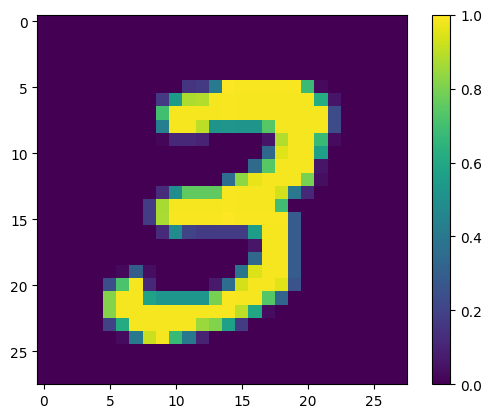

In [9]:
print(y_train[0])

plt.imshow(x_train[0, :, :, 0])
plt.colorbar()

### 1.2 Downscale the images

An image size of 28x28 is much too large for current quantum computers. Resize the image down to 4x4:

In [10]:
x_train_small = tf.image.resize(x_train, (4, 4)).numpy()
x_test_small = tf.image.resize(x_test, (4, 4)).numpy()

Again, display the first training example—after resize: 

True


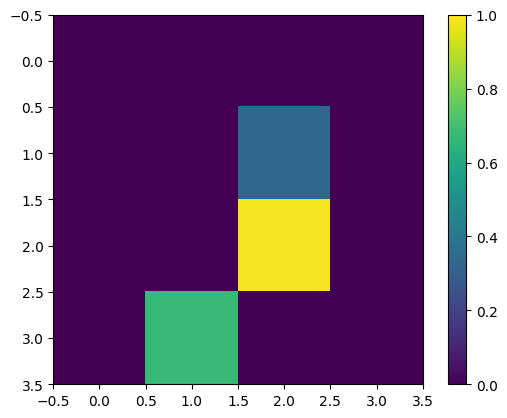

In [11]:
print(y_train[0])

plt.imshow(x_train_small[0, :, :, 0], vmin=0, vmax=1)
plt.colorbar()

### 1.3 Remove contradictory examples

From section *3.3 Learning to Distinguish Digits* of <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a>, filter the dataset to remove images that are labeled as belonging to both classes.

This is not a standard machine-learning procedure, but is included in the interest of following the paper.

In [12]:
def remove_contradicting(xs, ys):
    mapping = collections.defaultdict(set)
    orig_x = {}
    # Determine the set of labels for each unique image:
    for x, y in zip(xs, ys):
        orig_x[tuple(x.flatten())] = x
        mapping[tuple(x.flatten())].add(y)

    new_x = []
    new_y = []
    for flatten_x in mapping:
        x = orig_x[flatten_x]
        labels = mapping[flatten_x]
        if len(labels) == 1:
            new_x.append(x)
            new_y.append(next(iter(labels)))
        else:
            # Throw out images that match more than one label.
            pass

    num_uniq_3 = sum(
        1 for value in mapping.values() if len(value) == 1 and True in value)
    num_uniq_6 = sum(
        1 for value in mapping.values() if len(value) == 1 and False in value)
    num_uniq_both = sum(1 for value in mapping.values() if len(value) == 2)

    print("Number of unique images:", len(mapping.values()))
    print("Number of unique 3s: ", num_uniq_3)
    print("Number of unique 6s: ", num_uniq_6)
    print("Number of unique contradicting labels (both 3 and 6): ",
          num_uniq_both)
    print()
    print("Initial number of images: ", len(xs))
    print("Remaining non-contradicting unique images: ", len(new_x))

    return np.array(new_x), np.array(new_y)

The resulting counts do not closely match the reported values, but the exact procedure is not specified.

It is also worth noting here that applying filtering contradictory examples at this point does not totally prevent the model from receiving contradictory training examples: the next step binarizes the data which will cause more collisions. 

In [13]:
x_train_nocon, y_train_nocon = remove_contradicting(x_train_small, y_train)

Number of unique images: 10387
Number of unique 3s:  4912
Number of unique 6s:  5426
Number of unique contradicting labels (both 3 and 6):  49

Initial number of images:  12049
Remaining non-contradicting unique images:  10338


### 1.4 Encode the data as quantum circuits

To process images using a quantum computer, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> proposed representing each pixel with a qubit, with the state depending on the value of the pixel. The first step is to convert to a binary encoding.

In [14]:
THRESHOLD = 0.5

x_train_bin = np.array(x_train_nocon > THRESHOLD, dtype=np.float32)
x_test_bin = np.array(x_test_small > THRESHOLD, dtype=np.float32)

If you were to remove contradictory images at this point you would be left with only 193, likely not enough for effective training.

In [15]:
_ = remove_contradicting(x_train_bin, y_train_nocon)

Number of unique images: 193
Number of unique 3s:  80
Number of unique 6s:  69
Number of unique contradicting labels (both 3 and 6):  44

Initial number of images:  10338
Remaining non-contradicting unique images:  149


The qubits at pixel indices with values that exceed a threshold, are rotated through an $X$ gate.

In [16]:
def convert_to_circuit(image):
    """Encode truncated classical image into quantum datapoint."""
    values = np.ndarray.flatten(image)
    qubits = cirq.GridQubit.rect(4, 4)
    circuit = cirq.Circuit()
    for i, value in enumerate(values):
        if value:
            circuit.append(cirq.X(qubits[i]))
    return circuit


x_train_circ = [convert_to_circuit(x) for x in x_train_bin]
x_test_circ = [convert_to_circuit(x) for x in x_test_bin]

Here is the circuit created for the first example (circuit diagrams do not show qubits with zero gates):

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


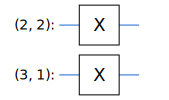

In [17]:
SVGCircuit(x_train_circ[0])

Compare this circuit to the indices where the image value exceeds the threshold:

In [18]:
bin_img = x_train_bin[0, :, :, 0]
indices = np.array(np.where(bin_img)).T
indices

array([[2, 2],
       [3, 1]])

Convert these `Cirq` circuits to tensors for `tfq`:

In [19]:
x_train_tfcirc = tfq.convert_to_tensor(x_train_circ)
x_test_tfcirc = tfq.convert_to_tensor(x_test_circ)

## 2. Quantum neural network

There is little guidance for a quantum circuit structure that classifies images. Since the classification is based on the expectation of the readout qubit, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> propose using two qubit gates, with the readout qubit always acted upon. This is similar in some ways to running small a <a href="https://arxiv.org/abs/1511.06464" class="external">Unitary RNN</a> across the pixels.

### 2.1 Build the model circuit

This following example shows this layered approach. Each layer uses *n* instances of the same gate, with each of the data qubits acting on the readout qubit.

Start with a simple class that will add a layer of these gates to a circuit:

In [20]:
class CircuitLayerBuilder():

    def __init__(self, data_qubits, readout):
        self.data_qubits = data_qubits
        self.readout = readout

    def add_layer(self, circuit, gate, prefix):
        for i, qubit in enumerate(self.data_qubits):
            symbol = sympy.Symbol(prefix + '-' + str(i))
            circuit.append(gate(qubit, self.readout)**symbol)

Build an example circuit layer to see how it looks:

findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


findfont: Font family 'Arial' not found.


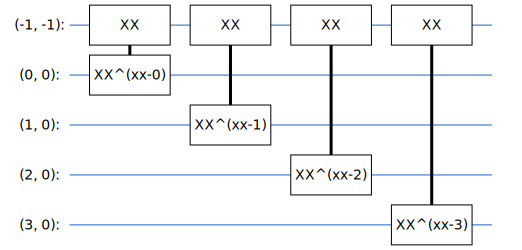

In [21]:
demo_builder = CircuitLayerBuilder(data_qubits=cirq.GridQubit.rect(4, 1),
                                   readout=cirq.GridQubit(-1, -1))

circuit = cirq.Circuit()
demo_builder.add_layer(circuit, gate=cirq.XX, prefix='xx')
SVGCircuit(circuit)

Now build a two-layered model, matching the data-circuit size, and include the preparation and readout operations.

In [22]:
def create_quantum_model():
    """Create a QNN model circuit and readout operation to go along with it."""
    data_qubits = cirq.GridQubit.rect(4, 4)  # a 4x4 grid.
    readout = cirq.GridQubit(-1, -1)  # a single qubit at [-1,-1]
    circuit = cirq.Circuit()

    # Prepare the readout qubit.
    circuit.append(cirq.X(readout))
    circuit.append(cirq.H(readout))

    builder = CircuitLayerBuilder(data_qubits=data_qubits, readout=readout)

    # Then add layers (experiment by adding more).
    builder.add_layer(circuit, cirq.XX, "xx1")
    builder.add_layer(circuit, cirq.ZZ, "zz1")

    # Finally, prepare the readout qubit.
    circuit.append(cirq.H(readout))

    return circuit, cirq.Z(readout)

In [23]:
model_circuit, model_readout = create_quantum_model()

### 2.2 Wrap the model-circuit in a tfq-keras model

Build the Keras model with the quantum components. This model is fed the "quantum data", from `x_train_circ`, that encodes the classical data. It uses a *Parametrized Quantum Circuit* layer, `tfq.layers.PQC`, to train the model circuit, on the quantum data.

To classify these images, <a href="https://arxiv.org/pdf/1802.06002.pdf" class="external">Farhi et al.</a> proposed taking the expectation of a readout qubit in a parameterized circuit. The expectation returns a value between 1 and -1.

In [24]:
# Build the Keras model.
model = tf.keras.Sequential([
    # The input is the data-circuit, encoded as a tf.string
    tf.keras.layers.Input(shape=(), dtype=tf.string),
    # The PQC layer returns the expected value of the readout gate, range [-1,1].
    tfq.layers.PQC(model_circuit, model_readout),
])

Next, describe the training procedure to the model, using the `compile` method.

Since the the expected readout is in the range `[-1,1]`, optimizing the hinge loss is a somewhat natural fit. 

Note: Another valid approach would be to shift the output range to `[0,1]`, and treat it as the probability the model assigns to class `3`. This could be used with a standard a `tf.losses.BinaryCrossentropy` loss.

To use the hinge loss here you need to make two small adjustments. First convert the labels, `y_train_nocon`, from boolean to `[-1,1]`, as expected by the hinge loss.

In [25]:
y_train_hinge = 2.0 * y_train_nocon - 1.0
y_test_hinge = 2.0 * y_test - 1.0

Second, use a custiom `hinge_accuracy` metric that correctly handles `[-1, 1]` as the `y_true` labels argument. 
`tf.losses.BinaryAccuracy(threshold=0.0)` expects `y_true` to be a boolean, and so can't be used with hinge loss).

In [26]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)

In [27]:
model.compile(loss=tf.keras.losses.Hinge(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[hinge_accuracy])

In [28]:
print(model.summary())

Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 pqc (PQC)                   (None, 1)                 32        


Total params: 32 (128.00 Byte)


Trainable params: 32 (128.00 Byte)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


None


### Train the quantum model

Now train the model—this takes about 45 min. If you don't want to wait that long, use a small subset of the data (set `NUM_EXAMPLES=500`, below). This doesn't really affect the model's progress during training (it only has 32 parameters, and doesn't need much data to constrain these). Using fewer examples just ends training earlier (5min), but runs long enough to show that it is making progress in the validation logs.

In [29]:
EPOCHS = 3
BATCH_SIZE = 32

NUM_EXAMPLES = len(x_train_tfcirc)

In [30]:
x_train_tfcirc_sub = x_train_tfcirc[:NUM_EXAMPLES]
y_train_hinge_sub = y_train_hinge[:NUM_EXAMPLES]

Training this model to convergence should achieve >85% accuracy on the test set.

In [31]:
qnn_history = model.fit(x_train_tfcirc_sub,
                        y_train_hinge_sub,
                        batch_size=32,
                        epochs=EPOCHS,
                        verbose=1,
                        validation_data=(x_test_tfcirc, y_test_hinge))

qnn_results = model.evaluate(x_test_tfcirc, y_test)

Epoch 1/3


  1/324 [..............................] - ETA: 3:40 - loss: 0.9737 - hinge_accuracy: 0.6875

  2/324 [..............................] - ETA: 58s - loss: 0.9995 - hinge_accuracy: 0.5312 

  3/324 [..............................] - ETA: 58s - loss: 1.0097 - hinge_accuracy: 0.4792

  4/324 [..............................] - ETA: 57s - loss: 1.0155 - hinge_accuracy: 0.4453

  5/324 [..............................] - ETA: 57s - loss: 1.0194 - hinge_accuracy: 0.4313

  6/324 [..............................] - ETA: 57s - loss: 1.0160 - hinge_accuracy: 0.4427

  7/324 [..............................] - ETA: 57s - loss: 1.0156 - hinge_accuracy: 0.4330

  8/324 [..............................] - ETA: 56s - loss: 1.0152 - hinge_accuracy: 0.4336

  9/324 [..............................] - ETA: 56s - loss: 1.0157 - hinge_accuracy: 0.4375

 10/324 [..............................] - ETA: 55s - loss: 1.0159 - hinge_accuracy: 0.4281

 11/324 [>.............................] - ETA: 55s - loss: 1.0132 - hinge_accuracy: 0.4489

 12/324 [>.............................] - ETA: 55s - loss: 1.0141 - hinge_accuracy: 0.4375

 13/324 [>.............................] - ETA: 55s - loss: 1.0146 - hinge_accuracy: 0.4303

 14/324 [>.............................] - ETA: 54s - loss: 1.0136 - hinge_accuracy: 0.4286

 15/324 [>.............................] - ETA: 54s - loss: 1.0123 - hinge_accuracy: 0.4313

 16/324 [>.............................] - ETA: 54s - loss: 1.0109 - hinge_accuracy: 0.4453

 17/324 [>.............................] - ETA: 54s - loss: 1.0108 - hinge_accuracy: 0.4412

 18/324 [>.............................] - ETA: 53s - loss: 1.0118 - hinge_accuracy: 0.4358

 19/324 [>.............................] - ETA: 53s - loss: 1.0121 - hinge_accuracy: 0.4309

 20/324 [>.............................] - ETA: 53s - loss: 1.0114 - hinge_accuracy: 0.4344

 21/324 [>.............................] - ETA: 53s - loss: 1.0098 - hinge_accuracy: 0.4435

 22/324 [=>............................] - ETA: 53s - loss: 1.0098 - hinge_accuracy: 0.4432

 23/324 [=>............................] - ETA: 53s - loss: 1.0097 - hinge_accuracy: 0.4429

 24/324 [=>............................] - ETA: 53s - loss: 1.0097 - hinge_accuracy: 0.4401

 25/324 [=>............................] - ETA: 53s - loss: 1.0097 - hinge_accuracy: 0.4400

 26/324 [=>............................] - ETA: 53s - loss: 1.0091 - hinge_accuracy: 0.4435

 27/324 [=>............................] - ETA: 53s - loss: 1.0090 - hinge_accuracy: 0.4433

 28/324 [=>............................] - ETA: 53s - loss: 1.0083 - hinge_accuracy: 0.4475

 29/324 [=>............................] - ETA: 52s - loss: 1.0092 - hinge_accuracy: 0.4429

 30/324 [=>............................] - ETA: 52s - loss: 1.0087 - hinge_accuracy: 0.4458

 31/324 [=>............................] - ETA: 52s - loss: 1.0086 - hinge_accuracy: 0.4466

 32/324 [=>............................] - ETA: 52s - loss: 1.0091 - hinge_accuracy: 0.4414

 33/324 [==>...........................] - ETA: 51s - loss: 1.0092 - hinge_accuracy: 0.4413

 34/324 [==>...........................] - ETA: 51s - loss: 1.0095 - hinge_accuracy: 0.4384

 35/324 [==>...........................] - ETA: 51s - loss: 1.0091 - hinge_accuracy: 0.4411

 36/324 [==>...........................] - ETA: 51s - loss: 1.0091 - hinge_accuracy: 0.4401

 37/324 [==>...........................] - ETA: 51s - loss: 1.0093 - hinge_accuracy: 0.4400

 38/324 [==>...........................] - ETA: 50s - loss: 1.0089 - hinge_accuracy: 0.4424

 39/324 [==>...........................] - ETA: 50s - loss: 1.0083 - hinge_accuracy: 0.4471

 40/324 [==>...........................] - ETA: 50s - loss: 1.0080 - hinge_accuracy: 0.4516

 41/324 [==>...........................] - ETA: 50s - loss: 1.0083 - hinge_accuracy: 0.4489

 42/324 [==>...........................] - ETA: 50s - loss: 1.0081 - hinge_accuracy: 0.4501

 43/324 [==>...........................] - ETA: 49s - loss: 1.0080 - hinge_accuracy: 0.4506

 44/324 [===>..........................] - ETA: 49s - loss: 1.0078 - hinge_accuracy: 0.4517

 45/324 [===>..........................] - ETA: 49s - loss: 1.0076 - hinge_accuracy: 0.4535

 46/324 [===>..........................] - ETA: 49s - loss: 1.0076 - hinge_accuracy: 0.4552

 47/324 [===>..........................] - ETA: 49s - loss: 1.0072 - hinge_accuracy: 0.4568

 48/324 [===>..........................] - ETA: 48s - loss: 1.0072 - hinge_accuracy: 0.4564

 49/324 [===>..........................] - ETA: 48s - loss: 1.0068 - hinge_accuracy: 0.4585

 50/324 [===>..........................] - ETA: 48s - loss: 1.0068 - hinge_accuracy: 0.4594

 51/324 [===>..........................] - ETA: 48s - loss: 1.0067 - hinge_accuracy: 0.4596

 52/324 [===>..........................] - ETA: 48s - loss: 1.0068 - hinge_accuracy: 0.4591

 53/324 [===>..........................] - ETA: 48s - loss: 1.0064 - hinge_accuracy: 0.4605

 54/324 [====>.........................] - ETA: 47s - loss: 1.0062 - hinge_accuracy: 0.4618

 55/324 [====>.........................] - ETA: 47s - loss: 1.0064 - hinge_accuracy: 0.4602

 56/324 [====>.........................] - ETA: 47s - loss: 1.0066 - hinge_accuracy: 0.4593

 57/324 [====>.........................] - ETA: 47s - loss: 1.0060 - hinge_accuracy: 0.4633

 58/324 [====>.........................] - ETA: 47s - loss: 1.0055 - hinge_accuracy: 0.4661

 59/324 [====>.........................] - ETA: 46s - loss: 1.0054 - hinge_accuracy: 0.4672

 60/324 [====>.........................] - ETA: 46s - loss: 1.0054 - hinge_accuracy: 0.4672

 61/324 [====>.........................] - ETA: 46s - loss: 1.0054 - hinge_accuracy: 0.4667

 62/324 [====>.........................] - ETA: 46s - loss: 1.0055 - hinge_accuracy: 0.4647

 63/324 [====>.........................] - ETA: 46s - loss: 1.0054 - hinge_accuracy: 0.4638

 64/324 [====>.........................] - ETA: 45s - loss: 1.0057 - hinge_accuracy: 0.4614

 65/324 [=====>........................] - ETA: 45s - loss: 1.0055 - hinge_accuracy: 0.4630

 66/324 [=====>........................] - ETA: 45s - loss: 1.0055 - hinge_accuracy: 0.4616

 67/324 [=====>........................] - ETA: 45s - loss: 1.0055 - hinge_accuracy: 0.4608

 68/324 [=====>........................] - ETA: 45s - loss: 1.0051 - hinge_accuracy: 0.4637

 69/324 [=====>........................] - ETA: 45s - loss: 1.0049 - hinge_accuracy: 0.4656

 70/324 [=====>........................] - ETA: 44s - loss: 1.0046 - hinge_accuracy: 0.4670

 71/324 [=====>........................] - ETA: 44s - loss: 1.0045 - hinge_accuracy: 0.4679

 72/324 [=====>........................] - ETA: 44s - loss: 1.0043 - hinge_accuracy: 0.4683

 73/324 [=====>........................] - ETA: 44s - loss: 1.0042 - hinge_accuracy: 0.4692

 74/324 [=====>........................] - ETA: 44s - loss: 1.0042 - hinge_accuracy: 0.4683

 75/324 [=====>........................] - ETA: 43s - loss: 1.0042 - hinge_accuracy: 0.4671

 76/324 [======>.......................] - ETA: 43s - loss: 1.0041 - hinge_accuracy: 0.4675

 77/324 [======>.......................] - ETA: 43s - loss: 1.0041 - hinge_accuracy: 0.4659

 78/324 [======>.......................] - ETA: 43s - loss: 1.0038 - hinge_accuracy: 0.4671

 79/324 [======>.......................] - ETA: 43s - loss: 1.0036 - hinge_accuracy: 0.4684

 80/324 [======>.......................] - ETA: 43s - loss: 1.0037 - hinge_accuracy: 0.4664

 81/324 [======>.......................] - ETA: 42s - loss: 1.0038 - hinge_accuracy: 0.4649

 82/324 [======>.......................] - ETA: 42s - loss: 1.0039 - hinge_accuracy: 0.4646

 83/324 [======>.......................] - ETA: 42s - loss: 1.0040 - hinge_accuracy: 0.4631

 84/324 [======>.......................] - ETA: 42s - loss: 1.0037 - hinge_accuracy: 0.4654

 85/324 [======>.......................] - ETA: 42s - loss: 1.0037 - hinge_accuracy: 0.4643

 86/324 [======>.......................] - ETA: 41s - loss: 1.0037 - hinge_accuracy: 0.4637

 87/324 [=======>......................] - ETA: 41s - loss: 1.0038 - hinge_accuracy: 0.4623

 88/324 [=======>......................] - ETA: 41s - loss: 1.0038 - hinge_accuracy: 0.4616

 89/324 [=======>......................] - ETA: 41s - loss: 1.0036 - hinge_accuracy: 0.4628

 90/324 [=======>......................] - ETA: 41s - loss: 1.0033 - hinge_accuracy: 0.4646

 91/324 [=======>......................] - ETA: 41s - loss: 1.0030 - hinge_accuracy: 0.4663

 92/324 [=======>......................] - ETA: 40s - loss: 1.0029 - hinge_accuracy: 0.4681

 93/324 [=======>......................] - ETA: 40s - loss: 1.0029 - hinge_accuracy: 0.4681

 94/324 [=======>......................] - ETA: 40s - loss: 1.0029 - hinge_accuracy: 0.4688

 95/324 [=======>......................] - ETA: 40s - loss: 1.0028 - hinge_accuracy: 0.4688

 96/324 [=======>......................] - ETA: 40s - loss: 1.0027 - hinge_accuracy: 0.4691

 97/324 [=======>......................] - ETA: 39s - loss: 1.0027 - hinge_accuracy: 0.4691

 98/324 [========>.....................] - ETA: 39s - loss: 1.0028 - hinge_accuracy: 0.4688

 99/324 [========>.....................] - ETA: 39s - loss: 1.0030 - hinge_accuracy: 0.4672

100/324 [========>.....................] - ETA: 39s - loss: 1.0030 - hinge_accuracy: 0.4675

101/324 [========>.....................] - ETA: 39s - loss: 1.0030 - hinge_accuracy: 0.4672

102/324 [========>.....................] - ETA: 38s - loss: 1.0030 - hinge_accuracy: 0.4675

103/324 [========>.....................] - ETA: 38s - loss: 1.0030 - hinge_accuracy: 0.4678

104/324 [========>.....................] - ETA: 38s - loss: 1.0029 - hinge_accuracy: 0.4684

105/324 [========>.....................] - ETA: 38s - loss: 1.0027 - hinge_accuracy: 0.4693

106/324 [========>.....................] - ETA: 38s - loss: 1.0026 - hinge_accuracy: 0.4702

107/324 [========>.....................] - ETA: 38s - loss: 1.0026 - hinge_accuracy: 0.4708

108/324 [=========>....................] - ETA: 37s - loss: 1.0026 - hinge_accuracy: 0.4705

109/324 [=========>....................] - ETA: 37s - loss: 1.0024 - hinge_accuracy: 0.4719

110/324 [=========>....................] - ETA: 37s - loss: 1.0023 - hinge_accuracy: 0.4716

111/324 [=========>....................] - ETA: 37s - loss: 1.0022 - hinge_accuracy: 0.4724

112/324 [=========>....................] - ETA: 37s - loss: 1.0022 - hinge_accuracy: 0.4724

113/324 [=========>....................] - ETA: 37s - loss: 1.0019 - hinge_accuracy: 0.4751

114/324 [=========>....................] - ETA: 36s - loss: 1.0018 - hinge_accuracy: 0.4762

115/324 [=========>....................] - ETA: 36s - loss: 1.0017 - hinge_accuracy: 0.4769

116/324 [=========>....................] - ETA: 36s - loss: 1.0015 - hinge_accuracy: 0.4782

117/324 [=========>....................] - ETA: 36s - loss: 1.0013 - hinge_accuracy: 0.4802

118/324 [=========>....................] - ETA: 36s - loss: 1.0011 - hinge_accuracy: 0.4812

119/324 [==========>...................] - ETA: 35s - loss: 1.0009 - hinge_accuracy: 0.4829

120/324 [==========>...................] - ETA: 35s - loss: 1.0007 - hinge_accuracy: 0.4846

121/324 [==========>...................] - ETA: 35s - loss: 1.0007 - hinge_accuracy: 0.4850

122/324 [==========>...................] - ETA: 35s - loss: 1.0002 - hinge_accuracy: 0.4877

123/324 [==========>...................] - ETA: 35s - loss: 0.9999 - hinge_accuracy: 0.4898

124/324 [==========>...................] - ETA: 35s - loss: 0.9999 - hinge_accuracy: 0.4897

125/324 [==========>...................] - ETA: 34s - loss: 0.9998 - hinge_accuracy: 0.4908

126/324 [==========>...................] - ETA: 34s - loss: 0.9998 - hinge_accuracy: 0.4906

127/324 [==========>...................] - ETA: 34s - loss: 0.9995 - hinge_accuracy: 0.4921

128/324 [==========>...................] - ETA: 34s - loss: 0.9992 - hinge_accuracy: 0.4937

129/324 [==========>...................] - ETA: 34s - loss: 0.9992 - hinge_accuracy: 0.4937

130/324 [===========>..................] - ETA: 34s - loss: 0.9991 - hinge_accuracy: 0.4940

131/324 [===========>..................] - ETA: 33s - loss: 0.9991 - hinge_accuracy: 0.4943

132/324 [===========>..................] - ETA: 33s - loss: 0.9990 - hinge_accuracy: 0.4950

133/324 [===========>..................] - ETA: 33s - loss: 0.9988 - hinge_accuracy: 0.4955

134/324 [===========>..................] - ETA: 33s - loss: 0.9986 - hinge_accuracy: 0.4965

135/324 [===========>..................] - ETA: 33s - loss: 0.9986 - hinge_accuracy: 0.4963

136/324 [===========>..................] - ETA: 32s - loss: 0.9986 - hinge_accuracy: 0.4961

137/324 [===========>..................] - ETA: 32s - loss: 0.9984 - hinge_accuracy: 0.4966

138/324 [===========>..................] - ETA: 32s - loss: 0.9982 - hinge_accuracy: 0.4973

139/324 [===========>..................] - ETA: 32s - loss: 0.9980 - hinge_accuracy: 0.4980

140/324 [===========>..................] - ETA: 32s - loss: 0.9979 - hinge_accuracy: 0.4975

141/324 [============>.................] - ETA: 32s - loss: 0.9976 - hinge_accuracy: 0.4982

142/324 [============>.................] - ETA: 31s - loss: 0.9974 - hinge_accuracy: 0.4993

143/324 [============>.................] - ETA: 31s - loss: 0.9974 - hinge_accuracy: 0.4989

144/324 [============>.................] - ETA: 31s - loss: 0.9969 - hinge_accuracy: 0.5009

145/324 [============>.................] - ETA: 31s - loss: 0.9967 - hinge_accuracy: 0.5026

146/324 [============>.................] - ETA: 31s - loss: 0.9966 - hinge_accuracy: 0.5034

147/324 [============>.................] - ETA: 31s - loss: 0.9963 - hinge_accuracy: 0.5040

148/324 [============>.................] - ETA: 30s - loss: 0.9958 - hinge_accuracy: 0.5061

149/324 [============>.................] - ETA: 30s - loss: 0.9957 - hinge_accuracy: 0.5069

150/324 [============>.................] - ETA: 30s - loss: 0.9954 - hinge_accuracy: 0.5085

151/324 [============>.................] - ETA: 30s - loss: 0.9951 - hinge_accuracy: 0.5095

152/324 [=============>................] - ETA: 30s - loss: 0.9950 - hinge_accuracy: 0.5099

153/324 [=============>................] - ETA: 29s - loss: 0.9947 - hinge_accuracy: 0.5106

154/324 [=============>................] - ETA: 29s - loss: 0.9943 - hinge_accuracy: 0.5118

155/324 [=============>................] - ETA: 29s - loss: 0.9944 - hinge_accuracy: 0.5119

156/324 [=============>................] - ETA: 29s - loss: 0.9938 - hinge_accuracy: 0.5136

157/324 [=============>................] - ETA: 29s - loss: 0.9934 - hinge_accuracy: 0.5151

158/324 [=============>................] - ETA: 29s - loss: 0.9929 - hinge_accuracy: 0.5174

159/324 [=============>................] - ETA: 28s - loss: 0.9924 - hinge_accuracy: 0.5185

160/324 [=============>................] - ETA: 28s - loss: 0.9921 - hinge_accuracy: 0.5191

161/324 [=============>................] - ETA: 28s - loss: 0.9919 - hinge_accuracy: 0.5200

162/324 [==============>...............] - ETA: 28s - loss: 0.9916 - hinge_accuracy: 0.5212

163/324 [==============>...............] - ETA: 28s - loss: 0.9911 - hinge_accuracy: 0.5219

164/324 [==============>...............] - ETA: 28s - loss: 0.9912 - hinge_accuracy: 0.5219

165/324 [==============>...............] - ETA: 27s - loss: 0.9907 - hinge_accuracy: 0.5229

166/324 [==============>...............] - ETA: 27s - loss: 0.9902 - hinge_accuracy: 0.5245

167/324 [==============>...............] - ETA: 27s - loss: 0.9899 - hinge_accuracy: 0.5251

168/324 [==============>...............] - ETA: 27s - loss: 0.9895 - hinge_accuracy: 0.5262

169/324 [==============>...............] - ETA: 27s - loss: 0.9890 - hinge_accuracy: 0.5272

170/324 [==============>...............] - ETA: 26s - loss: 0.9887 - hinge_accuracy: 0.5279

171/324 [==============>...............] - ETA: 26s - loss: 0.9881 - hinge_accuracy: 0.5294

172/324 [==============>...............] - ETA: 26s - loss: 0.9876 - hinge_accuracy: 0.5305

173/324 [===============>..............] - ETA: 26s - loss: 0.9871 - hinge_accuracy: 0.5311

174/324 [===============>..............] - ETA: 26s - loss: 0.9866 - hinge_accuracy: 0.5312

175/324 [===============>..............] - ETA: 26s - loss: 0.9863 - hinge_accuracy: 0.5318

176/324 [===============>..............] - ETA: 25s - loss: 0.9859 - hinge_accuracy: 0.5328

177/324 [===============>..............] - ETA: 25s - loss: 0.9854 - hinge_accuracy: 0.5339

178/324 [===============>..............] - ETA: 25s - loss: 0.9852 - hinge_accuracy: 0.5339

179/324 [===============>..............] - ETA: 25s - loss: 0.9843 - hinge_accuracy: 0.5349

180/324 [===============>..............] - ETA: 25s - loss: 0.9843 - hinge_accuracy: 0.5347

181/324 [===============>..............] - ETA: 25s - loss: 0.9836 - hinge_accuracy: 0.5359

182/324 [===============>..............] - ETA: 24s - loss: 0.9828 - hinge_accuracy: 0.5371

183/324 [===============>..............] - ETA: 24s - loss: 0.9822 - hinge_accuracy: 0.5379

184/324 [================>.............] - ETA: 24s - loss: 0.9818 - hinge_accuracy: 0.5384

185/324 [================>.............] - ETA: 24s - loss: 0.9814 - hinge_accuracy: 0.5397

186/324 [================>.............] - ETA: 24s - loss: 0.9803 - hinge_accuracy: 0.5410

187/324 [================>.............] - ETA: 23s - loss: 0.9798 - hinge_accuracy: 0.5409

188/324 [================>.............] - ETA: 23s - loss: 0.9791 - hinge_accuracy: 0.5414

189/324 [================>.............] - ETA: 23s - loss: 0.9782 - hinge_accuracy: 0.5428

190/324 [================>.............] - ETA: 23s - loss: 0.9767 - hinge_accuracy: 0.5444

191/324 [================>.............] - ETA: 23s - loss: 0.9760 - hinge_accuracy: 0.5460

192/324 [================>.............] - ETA: 23s - loss: 0.9750 - hinge_accuracy: 0.5472

193/324 [================>.............] - ETA: 22s - loss: 0.9740 - hinge_accuracy: 0.5484

194/324 [================>.............] - ETA: 22s - loss: 0.9733 - hinge_accuracy: 0.5491

195/324 [=================>............] - ETA: 22s - loss: 0.9722 - hinge_accuracy: 0.5508

196/324 [=================>............] - ETA: 22s - loss: 0.9718 - hinge_accuracy: 0.5513

197/324 [=================>............] - ETA: 22s - loss: 0.9706 - hinge_accuracy: 0.5530

198/324 [=================>............] - ETA: 22s - loss: 0.9697 - hinge_accuracy: 0.5541

199/324 [=================>............] - ETA: 21s - loss: 0.9687 - hinge_accuracy: 0.5551

200/324 [=================>............] - ETA: 21s - loss: 0.9677 - hinge_accuracy: 0.5564

201/324 [=================>............] - ETA: 21s - loss: 0.9667 - hinge_accuracy: 0.5577

202/324 [=================>............] - ETA: 21s - loss: 0.9658 - hinge_accuracy: 0.5593

203/324 [=================>............] - ETA: 21s - loss: 0.9650 - hinge_accuracy: 0.5602

204/324 [=================>............] - ETA: 20s - loss: 0.9638 - hinge_accuracy: 0.5617

205/324 [=================>............] - ETA: 20s - loss: 0.9626 - hinge_accuracy: 0.5631

206/324 [==================>...........] - ETA: 20s - loss: 0.9611 - hinge_accuracy: 0.5648

207/324 [==================>...........] - ETA: 20s - loss: 0.9598 - hinge_accuracy: 0.5660

208/324 [==================>...........] - ETA: 20s - loss: 0.9580 - hinge_accuracy: 0.5676

209/324 [==================>...........] - ETA: 20s - loss: 0.9564 - hinge_accuracy: 0.5694

210/324 [==================>...........] - ETA: 19s - loss: 0.9548 - hinge_accuracy: 0.5708

211/324 [==================>...........] - ETA: 19s - loss: 0.9535 - hinge_accuracy: 0.5718

212/324 [==================>...........] - ETA: 19s - loss: 0.9524 - hinge_accuracy: 0.5731

213/324 [==================>...........] - ETA: 19s - loss: 0.9514 - hinge_accuracy: 0.5737

214/324 [==================>...........] - ETA: 19s - loss: 0.9506 - hinge_accuracy: 0.5746

215/324 [==================>...........] - ETA: 19s - loss: 0.9489 - hinge_accuracy: 0.5759

216/324 [===================>..........] - ETA: 18s - loss: 0.9471 - hinge_accuracy: 0.5773

217/324 [===================>..........] - ETA: 18s - loss: 0.9459 - hinge_accuracy: 0.5782

218/324 [===================>..........] - ETA: 18s - loss: 0.9441 - hinge_accuracy: 0.5793

219/324 [===================>..........] - ETA: 18s - loss: 0.9424 - hinge_accuracy: 0.5809

220/324 [===================>..........] - ETA: 18s - loss: 0.9412 - hinge_accuracy: 0.5818

221/324 [===================>..........] - ETA: 18s - loss: 0.9393 - hinge_accuracy: 0.5834

222/324 [===================>..........] - ETA: 17s - loss: 0.9385 - hinge_accuracy: 0.5839

223/324 [===================>..........] - ETA: 17s - loss: 0.9375 - hinge_accuracy: 0.5846

224/324 [===================>..........] - ETA: 17s - loss: 0.9365 - hinge_accuracy: 0.5850

225/324 [===================>..........] - ETA: 17s - loss: 0.9348 - hinge_accuracy: 0.5861

226/324 [===================>..........] - ETA: 17s - loss: 0.9334 - hinge_accuracy: 0.5874

227/324 [====================>.........] - ETA: 16s - loss: 0.9318 - hinge_accuracy: 0.5885

228/324 [====================>.........] - ETA: 16s - loss: 0.9305 - hinge_accuracy: 0.5892

229/324 [====================>.........] - ETA: 16s - loss: 0.9281 - hinge_accuracy: 0.5907

230/324 [====================>.........] - ETA: 16s - loss: 0.9262 - hinge_accuracy: 0.5921

231/324 [====================>.........] - ETA: 16s - loss: 0.9249 - hinge_accuracy: 0.5931

232/324 [====================>.........] - ETA: 16s - loss: 0.9232 - hinge_accuracy: 0.5943

233/324 [====================>.........] - ETA: 15s - loss: 0.9215 - hinge_accuracy: 0.5955

234/324 [====================>.........] - ETA: 15s - loss: 0.9195 - hinge_accuracy: 0.5970

235/324 [====================>.........] - ETA: 15s - loss: 0.9182 - hinge_accuracy: 0.5979

236/324 [====================>.........] - ETA: 15s - loss: 0.9167 - hinge_accuracy: 0.5992

237/324 [====================>.........] - ETA: 15s - loss: 0.9146 - hinge_accuracy: 0.6007

238/324 [=====================>........] - ETA: 15s - loss: 0.9129 - hinge_accuracy: 0.6016

239/324 [=====================>........] - ETA: 14s - loss: 0.9113 - hinge_accuracy: 0.6029

240/324 [=====================>........] - ETA: 14s - loss: 0.9094 - hinge_accuracy: 0.6040

241/324 [=====================>........] - ETA: 14s - loss: 0.9080 - hinge_accuracy: 0.6053

242/324 [=====================>........] - ETA: 14s - loss: 0.9067 - hinge_accuracy: 0.6061

243/324 [=====================>........] - ETA: 14s - loss: 0.9044 - hinge_accuracy: 0.6075

244/324 [=====================>........] - ETA: 13s - loss: 0.9025 - hinge_accuracy: 0.6086

245/324 [=====================>........] - ETA: 13s - loss: 0.9014 - hinge_accuracy: 0.6096

246/324 [=====================>........] - ETA: 13s - loss: 0.8999 - hinge_accuracy: 0.6106

247/324 [=====================>........] - ETA: 13s - loss: 0.8981 - hinge_accuracy: 0.6117

248/324 [=====================>........] - ETA: 13s - loss: 0.8965 - hinge_accuracy: 0.6125

249/324 [======================>.......] - ETA: 13s - loss: 0.8950 - hinge_accuracy: 0.6135

250/324 [======================>.......] - ETA: 12s - loss: 0.8938 - hinge_accuracy: 0.6141

251/324 [======================>.......] - ETA: 12s - loss: 0.8924 - hinge_accuracy: 0.6150

252/324 [======================>.......] - ETA: 12s - loss: 0.8914 - hinge_accuracy: 0.6158

253/324 [======================>.......] - ETA: 12s - loss: 0.8897 - hinge_accuracy: 0.6170

254/324 [======================>.......] - ETA: 12s - loss: 0.8877 - hinge_accuracy: 0.6181

255/324 [======================>.......] - ETA: 12s - loss: 0.8858 - hinge_accuracy: 0.6192

256/324 [======================>.......] - ETA: 11s - loss: 0.8839 - hinge_accuracy: 0.6204

257/324 [======================>.......] - ETA: 11s - loss: 0.8823 - hinge_accuracy: 0.6210

258/324 [======================>.......] - ETA: 11s - loss: 0.8811 - hinge_accuracy: 0.6217

259/324 [======================>.......] - ETA: 11s - loss: 0.8800 - hinge_accuracy: 0.6222

260/324 [=======================>......] - ETA: 11s - loss: 0.8787 - hinge_accuracy: 0.6231

261/324 [=======================>......] - ETA: 11s - loss: 0.8772 - hinge_accuracy: 0.6239

262/324 [=======================>......] - ETA: 10s - loss: 0.8761 - hinge_accuracy: 0.6246

263/324 [=======================>......] - ETA: 10s - loss: 0.8746 - hinge_accuracy: 0.6257

264/324 [=======================>......] - ETA: 10s - loss: 0.8725 - hinge_accuracy: 0.6270

265/324 [=======================>......] - ETA: 10s - loss: 0.8709 - hinge_accuracy: 0.6279

266/324 [=======================>......] - ETA: 10s - loss: 0.8694 - hinge_accuracy: 0.6289

267/324 [=======================>......] - ETA: 9s - loss: 0.8675 - hinge_accuracy: 0.6297 

268/324 [=======================>......] - ETA: 9s - loss: 0.8674 - hinge_accuracy: 0.6297

269/324 [=======================>......] - ETA: 9s - loss: 0.8656 - hinge_accuracy: 0.6307

270/324 [========================>.....] - ETA: 9s - loss: 0.8640 - hinge_accuracy: 0.6314

271/324 [========================>.....] - ETA: 9s - loss: 0.8624 - hinge_accuracy: 0.6323

272/324 [========================>.....] - ETA: 9s - loss: 0.8609 - hinge_accuracy: 0.6332

273/324 [========================>.....] - ETA: 8s - loss: 0.8597 - hinge_accuracy: 0.6339

274/324 [========================>.....] - ETA: 8s - loss: 0.8586 - hinge_accuracy: 0.6345

275/324 [========================>.....] - ETA: 8s - loss: 0.8575 - hinge_accuracy: 0.6351

276/324 [========================>.....] - ETA: 8s - loss: 0.8561 - hinge_accuracy: 0.6359

277/324 [========================>.....] - ETA: 8s - loss: 0.8549 - hinge_accuracy: 0.6364

278/324 [========================>.....] - ETA: 8s - loss: 0.8530 - hinge_accuracy: 0.6375

279/324 [========================>.....] - ETA: 7s - loss: 0.8515 - hinge_accuracy: 0.6383

280/324 [========================>.....] - ETA: 7s - loss: 0.8503 - hinge_accuracy: 0.6388

281/324 [=========================>....] - ETA: 7s - loss: 0.8496 - hinge_accuracy: 0.6391

282/324 [=========================>....] - ETA: 7s - loss: 0.8487 - hinge_accuracy: 0.6393

283/324 [=========================>....] - ETA: 7s - loss: 0.8477 - hinge_accuracy: 0.6398

284/324 [=========================>....] - ETA: 6s - loss: 0.8462 - hinge_accuracy: 0.6407

285/324 [=========================>....] - ETA: 6s - loss: 0.8448 - hinge_accuracy: 0.6412

286/324 [=========================>....] - ETA: 6s - loss: 0.8442 - hinge_accuracy: 0.6420

287/324 [=========================>....] - ETA: 6s - loss: 0.8427 - hinge_accuracy: 0.6431

288/324 [=========================>....] - ETA: 6s - loss: 0.8409 - hinge_accuracy: 0.6441

289/324 [=========================>....] - ETA: 6s - loss: 0.8400 - hinge_accuracy: 0.6446

290/324 [=========================>....] - ETA: 5s - loss: 0.8383 - hinge_accuracy: 0.6456

291/324 [=========================>....] - ETA: 5s - loss: 0.8369 - hinge_accuracy: 0.6464

292/324 [==========================>...] - ETA: 5s - loss: 0.8361 - hinge_accuracy: 0.6473

293/324 [==========================>...] - ETA: 5s - loss: 0.8350 - hinge_accuracy: 0.6479

294/324 [==========================>...] - ETA: 5s - loss: 0.8338 - hinge_accuracy: 0.6485

295/324 [==========================>...] - ETA: 5s - loss: 0.8323 - hinge_accuracy: 0.6492

296/324 [==========================>...] - ETA: 4s - loss: 0.8310 - hinge_accuracy: 0.6499

297/324 [==========================>...] - ETA: 4s - loss: 0.8298 - hinge_accuracy: 0.6505

298/324 [==========================>...] - ETA: 4s - loss: 0.8286 - hinge_accuracy: 0.6510

299/324 [==========================>...] - ETA: 4s - loss: 0.8277 - hinge_accuracy: 0.6515

300/324 [==========================>...] - ETA: 4s - loss: 0.8263 - hinge_accuracy: 0.6524

301/324 [==========================>...] - ETA: 4s - loss: 0.8247 - hinge_accuracy: 0.6532

302/324 [==========================>...] - ETA: 3s - loss: 0.8234 - hinge_accuracy: 0.6540

303/324 [===========================>..] - ETA: 3s - loss: 0.8221 - hinge_accuracy: 0.6546

304/324 [===========================>..] - ETA: 3s - loss: 0.8205 - hinge_accuracy: 0.6556

305/324 [===========================>..] - ETA: 3s - loss: 0.8199 - hinge_accuracy: 0.6559

306/324 [===========================>..] - ETA: 3s - loss: 0.8192 - hinge_accuracy: 0.6564

307/324 [===========================>..] - ETA: 2s - loss: 0.8183 - hinge_accuracy: 0.6568

308/324 [===========================>..] - ETA: 2s - loss: 0.8168 - hinge_accuracy: 0.6578

309/324 [===========================>..] - ETA: 2s - loss: 0.8156 - hinge_accuracy: 0.6584

310/324 [===========================>..] - ETA: 2s - loss: 0.8152 - hinge_accuracy: 0.6586

311/324 [===========================>..] - ETA: 2s - loss: 0.8141 - hinge_accuracy: 0.6591

312/324 [===========================>..] - ETA: 2s - loss: 0.8132 - hinge_accuracy: 0.6595

313/324 [===========================>..] - ETA: 1s - loss: 0.8123 - hinge_accuracy: 0.6599

314/324 [============================>.] - ETA: 1s - loss: 0.8112 - hinge_accuracy: 0.6604

315/324 [============================>.] - ETA: 1s - loss: 0.8097 - hinge_accuracy: 0.6614

316/324 [============================>.] - ETA: 1s - loss: 0.8085 - hinge_accuracy: 0.6621

317/324 [============================>.] - ETA: 1s - loss: 0.8077 - hinge_accuracy: 0.6624

318/324 [============================>.] - ETA: 1s - loss: 0.8067 - hinge_accuracy: 0.6628

319/324 [============================>.] - ETA: 0s - loss: 0.8056 - hinge_accuracy: 0.6634

320/324 [============================>.] - ETA: 0s - loss: 0.8042 - hinge_accuracy: 0.6641

321/324 [============================>.] - ETA: 0s - loss: 0.8036 - hinge_accuracy: 0.6644

322/324 [============================>.] - ETA: 0s - loss: 0.8033 - hinge_accuracy: 0.6646

323/324 [============================>.] - ETA: 0s - loss: 0.8022 - hinge_accuracy: 0.6651

324/324 [==============================] - ETA: 0s - loss: 0.8022 - hinge_accuracy: 0.6645

324/324 [==============================] - 59s 181ms/step - loss: 0.8022 - hinge_accuracy: 0.6645 - val_loss: 0.4146 - val_hinge_accuracy: 0.8710


Epoch 2/3


  1/324 [..............................] - ETA: 56s - loss: 0.2980 - hinge_accuracy: 0.8750

  2/324 [..............................] - ETA: 55s - loss: 0.3491 - hinge_accuracy: 0.8906

  3/324 [..............................] - ETA: 55s - loss: 0.4053 - hinge_accuracy: 0.8542

  4/324 [..............................] - ETA: 55s - loss: 0.3996 - hinge_accuracy: 0.8438

  5/324 [..............................] - ETA: 55s - loss: 0.4454 - hinge_accuracy: 0.8188

  6/324 [..............................] - ETA: 55s - loss: 0.4506 - hinge_accuracy: 0.8177

  7/324 [..............................] - ETA: 55s - loss: 0.4393 - hinge_accuracy: 0.8304

  8/324 [..............................] - ETA: 54s - loss: 0.4379 - hinge_accuracy: 0.8320

  9/324 [..............................] - ETA: 54s - loss: 0.4522 - hinge_accuracy: 0.8264

 10/324 [..............................] - ETA: 54s - loss: 0.4411 - hinge_accuracy: 0.8313

 11/324 [>.............................] - ETA: 54s - loss: 0.4414 - hinge_accuracy: 0.8324

 12/324 [>.............................] - ETA: 54s - loss: 0.4325 - hinge_accuracy: 0.8385

 13/324 [>.............................] - ETA: 54s - loss: 0.4299 - hinge_accuracy: 0.8462

 14/324 [>.............................] - ETA: 53s - loss: 0.4247 - hinge_accuracy: 0.8482

 15/324 [>.............................] - ETA: 53s - loss: 0.4334 - hinge_accuracy: 0.8417

 16/324 [>.............................] - ETA: 53s - loss: 0.4398 - hinge_accuracy: 0.8379

 17/324 [>.............................] - ETA: 53s - loss: 0.4333 - hinge_accuracy: 0.8438

 18/324 [>.............................] - ETA: 53s - loss: 0.4325 - hinge_accuracy: 0.8438

 19/324 [>.............................] - ETA: 53s - loss: 0.4359 - hinge_accuracy: 0.8421

 20/324 [>.............................] - ETA: 52s - loss: 0.4410 - hinge_accuracy: 0.8406

 21/324 [>.............................] - ETA: 52s - loss: 0.4393 - hinge_accuracy: 0.8408

 22/324 [=>............................] - ETA: 52s - loss: 0.4390 - hinge_accuracy: 0.8423

 23/324 [=>............................] - ETA: 52s - loss: 0.4457 - hinge_accuracy: 0.8383

 24/324 [=>............................] - ETA: 52s - loss: 0.4412 - hinge_accuracy: 0.8411

 25/324 [=>............................] - ETA: 51s - loss: 0.4410 - hinge_accuracy: 0.8400

 26/324 [=>............................] - ETA: 51s - loss: 0.4375 - hinge_accuracy: 0.8425

 27/324 [=>............................] - ETA: 51s - loss: 0.4455 - hinge_accuracy: 0.8380

 28/324 [=>............................] - ETA: 51s - loss: 0.4469 - hinge_accuracy: 0.8371

 29/324 [=>............................] - ETA: 51s - loss: 0.4440 - hinge_accuracy: 0.8373

 30/324 [=>............................] - ETA: 51s - loss: 0.4407 - hinge_accuracy: 0.8385

 31/324 [=>............................] - ETA: 50s - loss: 0.4392 - hinge_accuracy: 0.8397

 32/324 [=>............................] - ETA: 50s - loss: 0.4388 - hinge_accuracy: 0.8398

 33/324 [==>...........................] - ETA: 50s - loss: 0.4400 - hinge_accuracy: 0.8390

 34/324 [==>...........................] - ETA: 50s - loss: 0.4394 - hinge_accuracy: 0.8382

 35/324 [==>...........................] - ETA: 50s - loss: 0.4355 - hinge_accuracy: 0.8393

 36/324 [==>...........................] - ETA: 50s - loss: 0.4366 - hinge_accuracy: 0.8377

 37/324 [==>...........................] - ETA: 49s - loss: 0.4401 - hinge_accuracy: 0.8353

 38/324 [==>...........................] - ETA: 49s - loss: 0.4401 - hinge_accuracy: 0.8339

 39/324 [==>...........................] - ETA: 49s - loss: 0.4391 - hinge_accuracy: 0.8333

 40/324 [==>...........................] - ETA: 49s - loss: 0.4389 - hinge_accuracy: 0.8336

 41/324 [==>...........................] - ETA: 49s - loss: 0.4373 - hinge_accuracy: 0.8338

 42/324 [==>...........................] - ETA: 49s - loss: 0.4364 - hinge_accuracy: 0.8341

 43/324 [==>...........................] - ETA: 48s - loss: 0.4338 - hinge_accuracy: 0.8350

 44/324 [===>..........................] - ETA: 48s - loss: 0.4302 - hinge_accuracy: 0.8366

 45/324 [===>..........................] - ETA: 48s - loss: 0.4266 - hinge_accuracy: 0.8389

 46/324 [===>..........................] - ETA: 48s - loss: 0.4280 - hinge_accuracy: 0.8376

 47/324 [===>..........................] - ETA: 48s - loss: 0.4297 - hinge_accuracy: 0.8371

 48/324 [===>..........................] - ETA: 47s - loss: 0.4296 - hinge_accuracy: 0.8359

 49/324 [===>..........................] - ETA: 47s - loss: 0.4288 - hinge_accuracy: 0.8355

 50/324 [===>..........................] - ETA: 47s - loss: 0.4305 - hinge_accuracy: 0.8338

 51/324 [===>..........................] - ETA: 47s - loss: 0.4298 - hinge_accuracy: 0.8339

 52/324 [===>..........................] - ETA: 47s - loss: 0.4292 - hinge_accuracy: 0.8353

 53/324 [===>..........................] - ETA: 47s - loss: 0.4291 - hinge_accuracy: 0.8355

 54/324 [====>.........................] - ETA: 46s - loss: 0.4311 - hinge_accuracy: 0.8345

 55/324 [====>.........................] - ETA: 46s - loss: 0.4316 - hinge_accuracy: 0.8335

 56/324 [====>.........................] - ETA: 46s - loss: 0.4292 - hinge_accuracy: 0.8343

 57/324 [====>.........................] - ETA: 46s - loss: 0.4297 - hinge_accuracy: 0.8333

 58/324 [====>.........................] - ETA: 46s - loss: 0.4299 - hinge_accuracy: 0.8335

 59/324 [====>.........................] - ETA: 46s - loss: 0.4294 - hinge_accuracy: 0.8342

 60/324 [====>.........................] - ETA: 45s - loss: 0.4291 - hinge_accuracy: 0.8339

 61/324 [====>.........................] - ETA: 45s - loss: 0.4273 - hinge_accuracy: 0.8345

 62/324 [====>.........................] - ETA: 45s - loss: 0.4261 - hinge_accuracy: 0.8347

 63/324 [====>.........................] - ETA: 45s - loss: 0.4234 - hinge_accuracy: 0.8368

 64/324 [====>.........................] - ETA: 45s - loss: 0.4208 - hinge_accuracy: 0.8389

 65/324 [=====>........................] - ETA: 45s - loss: 0.4197 - hinge_accuracy: 0.8404

 66/324 [=====>........................] - ETA: 44s - loss: 0.4197 - hinge_accuracy: 0.8400

 67/324 [=====>........................] - ETA: 44s - loss: 0.4188 - hinge_accuracy: 0.8405

 68/324 [=====>........................] - ETA: 44s - loss: 0.4195 - hinge_accuracy: 0.8401

 69/324 [=====>........................] - ETA: 44s - loss: 0.4196 - hinge_accuracy: 0.8392

 70/324 [=====>........................] - ETA: 44s - loss: 0.4206 - hinge_accuracy: 0.8384

 71/324 [=====>........................] - ETA: 43s - loss: 0.4207 - hinge_accuracy: 0.8389

 72/324 [=====>........................] - ETA: 43s - loss: 0.4213 - hinge_accuracy: 0.8381

 73/324 [=====>........................] - ETA: 43s - loss: 0.4198 - hinge_accuracy: 0.8390

 74/324 [=====>........................] - ETA: 43s - loss: 0.4222 - hinge_accuracy: 0.8370

 75/324 [=====>........................] - ETA: 43s - loss: 0.4215 - hinge_accuracy: 0.8371

 76/324 [======>.......................] - ETA: 43s - loss: 0.4213 - hinge_accuracy: 0.8376

 77/324 [======>.......................] - ETA: 42s - loss: 0.4211 - hinge_accuracy: 0.8373

 78/324 [======>.......................] - ETA: 42s - loss: 0.4211 - hinge_accuracy: 0.8373

 79/324 [======>.......................] - ETA: 42s - loss: 0.4230 - hinge_accuracy: 0.8370

 80/324 [======>.......................] - ETA: 42s - loss: 0.4203 - hinge_accuracy: 0.8383

 81/324 [======>.......................] - ETA: 42s - loss: 0.4198 - hinge_accuracy: 0.8387

 82/324 [======>.......................] - ETA: 42s - loss: 0.4196 - hinge_accuracy: 0.8392

 83/324 [======>.......................] - ETA: 41s - loss: 0.4192 - hinge_accuracy: 0.8396

 84/324 [======>.......................] - ETA: 41s - loss: 0.4191 - hinge_accuracy: 0.8397

 85/324 [======>.......................] - ETA: 41s - loss: 0.4186 - hinge_accuracy: 0.8404

 86/324 [======>.......................] - ETA: 41s - loss: 0.4193 - hinge_accuracy: 0.8398

 87/324 [=======>......................] - ETA: 41s - loss: 0.4207 - hinge_accuracy: 0.8387

 88/324 [=======>......................] - ETA: 40s - loss: 0.4192 - hinge_accuracy: 0.8402

 89/324 [=======>......................] - ETA: 40s - loss: 0.4183 - hinge_accuracy: 0.8402

 90/324 [=======>......................] - ETA: 40s - loss: 0.4189 - hinge_accuracy: 0.8396

 91/324 [=======>......................] - ETA: 40s - loss: 0.4181 - hinge_accuracy: 0.8400

 92/324 [=======>......................] - ETA: 40s - loss: 0.4190 - hinge_accuracy: 0.8397

 93/324 [=======>......................] - ETA: 40s - loss: 0.4179 - hinge_accuracy: 0.8401

 94/324 [=======>......................] - ETA: 39s - loss: 0.4192 - hinge_accuracy: 0.8394

 95/324 [=======>......................] - ETA: 39s - loss: 0.4204 - hinge_accuracy: 0.8382

 96/324 [=======>......................] - ETA: 39s - loss: 0.4213 - hinge_accuracy: 0.8382

 97/324 [=======>......................] - ETA: 39s - loss: 0.4220 - hinge_accuracy: 0.8376

 98/324 [========>.....................] - ETA: 39s - loss: 0.4202 - hinge_accuracy: 0.8386

 99/324 [========>.....................] - ETA: 39s - loss: 0.4195 - hinge_accuracy: 0.8390

100/324 [========>.....................] - ETA: 38s - loss: 0.4198 - hinge_accuracy: 0.8381

101/324 [========>.....................] - ETA: 38s - loss: 0.4197 - hinge_accuracy: 0.8385

102/324 [========>.....................] - ETA: 38s - loss: 0.4185 - hinge_accuracy: 0.8392

103/324 [========>.....................] - ETA: 38s - loss: 0.4194 - hinge_accuracy: 0.8386

104/324 [========>.....................] - ETA: 38s - loss: 0.4197 - hinge_accuracy: 0.8383

105/324 [========>.....................] - ETA: 38s - loss: 0.4207 - hinge_accuracy: 0.8375

106/324 [========>.....................] - ETA: 37s - loss: 0.4207 - hinge_accuracy: 0.8373

107/324 [========>.....................] - ETA: 37s - loss: 0.4206 - hinge_accuracy: 0.8367

108/324 [=========>....................] - ETA: 37s - loss: 0.4209 - hinge_accuracy: 0.8371

109/324 [=========>....................] - ETA: 37s - loss: 0.4221 - hinge_accuracy: 0.8363

110/324 [=========>....................] - ETA: 37s - loss: 0.4234 - hinge_accuracy: 0.8355

111/324 [=========>....................] - ETA: 36s - loss: 0.4229 - hinge_accuracy: 0.8356

112/324 [=========>....................] - ETA: 36s - loss: 0.4216 - hinge_accuracy: 0.8359

113/324 [=========>....................] - ETA: 36s - loss: 0.4214 - hinge_accuracy: 0.8366

114/324 [=========>....................] - ETA: 36s - loss: 0.4223 - hinge_accuracy: 0.8361

115/324 [=========>....................] - ETA: 36s - loss: 0.4224 - hinge_accuracy: 0.8359

116/324 [=========>....................] - ETA: 36s - loss: 0.4223 - hinge_accuracy: 0.8359

117/324 [=========>....................] - ETA: 35s - loss: 0.4229 - hinge_accuracy: 0.8355

118/324 [=========>....................] - ETA: 35s - loss: 0.4227 - hinge_accuracy: 0.8361

119/324 [==========>...................] - ETA: 35s - loss: 0.4226 - hinge_accuracy: 0.8361

120/324 [==========>...................] - ETA: 35s - loss: 0.4235 - hinge_accuracy: 0.8357

121/324 [==========>...................] - ETA: 35s - loss: 0.4223 - hinge_accuracy: 0.8363

122/324 [==========>...................] - ETA: 35s - loss: 0.4212 - hinge_accuracy: 0.8368

123/324 [==========>...................] - ETA: 34s - loss: 0.4218 - hinge_accuracy: 0.8366

124/324 [==========>...................] - ETA: 34s - loss: 0.4224 - hinge_accuracy: 0.8357

125/324 [==========>...................] - ETA: 34s - loss: 0.4220 - hinge_accuracy: 0.8360

126/324 [==========>...................] - ETA: 34s - loss: 0.4223 - hinge_accuracy: 0.8353

127/324 [==========>...................] - ETA: 34s - loss: 0.4234 - hinge_accuracy: 0.8349

128/324 [==========>...................] - ETA: 34s - loss: 0.4220 - hinge_accuracy: 0.8354

129/324 [==========>...................] - ETA: 33s - loss: 0.4223 - hinge_accuracy: 0.8353

130/324 [===========>..................] - ETA: 33s - loss: 0.4210 - hinge_accuracy: 0.8358

131/324 [===========>..................] - ETA: 33s - loss: 0.4217 - hinge_accuracy: 0.8354

132/324 [===========>..................] - ETA: 33s - loss: 0.4229 - hinge_accuracy: 0.8345

133/324 [===========>..................] - ETA: 33s - loss: 0.4228 - hinge_accuracy: 0.8346

134/324 [===========>..................] - ETA: 33s - loss: 0.4224 - hinge_accuracy: 0.8349

135/324 [===========>..................] - ETA: 32s - loss: 0.4236 - hinge_accuracy: 0.8338

136/324 [===========>..................] - ETA: 32s - loss: 0.4249 - hinge_accuracy: 0.8334

137/324 [===========>..................] - ETA: 32s - loss: 0.4245 - hinge_accuracy: 0.8337

138/324 [===========>..................] - ETA: 32s - loss: 0.4242 - hinge_accuracy: 0.8336

139/324 [===========>..................] - ETA: 32s - loss: 0.4252 - hinge_accuracy: 0.8332

140/324 [===========>..................] - ETA: 31s - loss: 0.4246 - hinge_accuracy: 0.8333

141/324 [============>.................] - ETA: 31s - loss: 0.4232 - hinge_accuracy: 0.8338

142/324 [============>.................] - ETA: 31s - loss: 0.4225 - hinge_accuracy: 0.8338

143/324 [============>.................] - ETA: 31s - loss: 0.4212 - hinge_accuracy: 0.8348

144/324 [============>.................] - ETA: 31s - loss: 0.4211 - hinge_accuracy: 0.8346

145/324 [============>.................] - ETA: 31s - loss: 0.4209 - hinge_accuracy: 0.8347

146/324 [============>.................] - ETA: 30s - loss: 0.4213 - hinge_accuracy: 0.8352

147/324 [============>.................] - ETA: 30s - loss: 0.4210 - hinge_accuracy: 0.8352

148/324 [============>.................] - ETA: 30s - loss: 0.4210 - hinge_accuracy: 0.8353

149/324 [============>.................] - ETA: 30s - loss: 0.4204 - hinge_accuracy: 0.8354

150/324 [============>.................] - ETA: 30s - loss: 0.4196 - hinge_accuracy: 0.8358

151/324 [============>.................] - ETA: 30s - loss: 0.4198 - hinge_accuracy: 0.8355

152/324 [=============>................] - ETA: 29s - loss: 0.4193 - hinge_accuracy: 0.8357

153/324 [=============>................] - ETA: 29s - loss: 0.4191 - hinge_accuracy: 0.8358

154/324 [=============>................] - ETA: 29s - loss: 0.4197 - hinge_accuracy: 0.8360

155/324 [=============>................] - ETA: 29s - loss: 0.4201 - hinge_accuracy: 0.8359

156/324 [=============>................] - ETA: 29s - loss: 0.4191 - hinge_accuracy: 0.8363

157/324 [=============>................] - ETA: 29s - loss: 0.4192 - hinge_accuracy: 0.8364

158/324 [=============>................] - ETA: 28s - loss: 0.4194 - hinge_accuracy: 0.8364

159/324 [=============>................] - ETA: 28s - loss: 0.4198 - hinge_accuracy: 0.8363

160/324 [=============>................] - ETA: 28s - loss: 0.4194 - hinge_accuracy: 0.8363

161/324 [=============>................] - ETA: 28s - loss: 0.4192 - hinge_accuracy: 0.8366

162/324 [==============>...............] - ETA: 28s - loss: 0.4195 - hinge_accuracy: 0.8366

163/324 [==============>...............] - ETA: 27s - loss: 0.4195 - hinge_accuracy: 0.8368

164/324 [==============>...............] - ETA: 27s - loss: 0.4191 - hinge_accuracy: 0.8371

165/324 [==============>...............] - ETA: 27s - loss: 0.4195 - hinge_accuracy: 0.8369

166/324 [==============>...............] - ETA: 27s - loss: 0.4196 - hinge_accuracy: 0.8370

167/324 [==============>...............] - ETA: 27s - loss: 0.4198 - hinge_accuracy: 0.8368

168/324 [==============>...............] - ETA: 27s - loss: 0.4189 - hinge_accuracy: 0.8372

169/324 [==============>...............] - ETA: 26s - loss: 0.4191 - hinge_accuracy: 0.8373

170/324 [==============>...............] - ETA: 26s - loss: 0.4195 - hinge_accuracy: 0.8371

171/324 [==============>...............] - ETA: 26s - loss: 0.4201 - hinge_accuracy: 0.8368

172/324 [==============>...............] - ETA: 26s - loss: 0.4202 - hinge_accuracy: 0.8365

173/324 [===============>..............] - ETA: 26s - loss: 0.4198 - hinge_accuracy: 0.8365

174/324 [===============>..............] - ETA: 26s - loss: 0.4192 - hinge_accuracy: 0.8369

175/324 [===============>..............] - ETA: 25s - loss: 0.4186 - hinge_accuracy: 0.8373

176/324 [===============>..............] - ETA: 25s - loss: 0.4174 - hinge_accuracy: 0.8381

177/324 [===============>..............] - ETA: 25s - loss: 0.4178 - hinge_accuracy: 0.8381

178/324 [===============>..............] - ETA: 25s - loss: 0.4193 - hinge_accuracy: 0.8373

179/324 [===============>..............] - ETA: 25s - loss: 0.4189 - hinge_accuracy: 0.8375

180/324 [===============>..............] - ETA: 25s - loss: 0.4191 - hinge_accuracy: 0.8377

181/324 [===============>..............] - ETA: 24s - loss: 0.4185 - hinge_accuracy: 0.8381

182/324 [===============>..............] - ETA: 24s - loss: 0.4180 - hinge_accuracy: 0.8381

183/324 [===============>..............] - ETA: 24s - loss: 0.4186 - hinge_accuracy: 0.8376

184/324 [================>.............] - ETA: 24s - loss: 0.4180 - hinge_accuracy: 0.8378

185/324 [================>.............] - ETA: 24s - loss: 0.4179 - hinge_accuracy: 0.8377

186/324 [================>.............] - ETA: 23s - loss: 0.4177 - hinge_accuracy: 0.8377

187/324 [================>.............] - ETA: 23s - loss: 0.4176 - hinge_accuracy: 0.8381

188/324 [================>.............] - ETA: 23s - loss: 0.4178 - hinge_accuracy: 0.8383

189/324 [================>.............] - ETA: 23s - loss: 0.4171 - hinge_accuracy: 0.8386

190/324 [================>.............] - ETA: 23s - loss: 0.4168 - hinge_accuracy: 0.8388

191/324 [================>.............] - ETA: 23s - loss: 0.4163 - hinge_accuracy: 0.8388

192/324 [================>.............] - ETA: 22s - loss: 0.4166 - hinge_accuracy: 0.8387

193/324 [================>.............] - ETA: 22s - loss: 0.4165 - hinge_accuracy: 0.8387

194/324 [================>.............] - ETA: 22s - loss: 0.4168 - hinge_accuracy: 0.8386

195/324 [=================>............] - ETA: 22s - loss: 0.4170 - hinge_accuracy: 0.8383

196/324 [=================>............] - ETA: 22s - loss: 0.4172 - hinge_accuracy: 0.8382

197/324 [=================>............] - ETA: 22s - loss: 0.4170 - hinge_accuracy: 0.8380

198/324 [=================>............] - ETA: 21s - loss: 0.4174 - hinge_accuracy: 0.8376

199/324 [=================>............] - ETA: 21s - loss: 0.4176 - hinge_accuracy: 0.8378

200/324 [=================>............] - ETA: 21s - loss: 0.4173 - hinge_accuracy: 0.8380

201/324 [=================>............] - ETA: 21s - loss: 0.4173 - hinge_accuracy: 0.8380

202/324 [=================>............] - ETA: 21s - loss: 0.4169 - hinge_accuracy: 0.8382

203/324 [=================>............] - ETA: 21s - loss: 0.4158 - hinge_accuracy: 0.8388

204/324 [=================>............] - ETA: 20s - loss: 0.4154 - hinge_accuracy: 0.8392

205/324 [=================>............] - ETA: 20s - loss: 0.4151 - hinge_accuracy: 0.8392

206/324 [==================>...........] - ETA: 20s - loss: 0.4153 - hinge_accuracy: 0.8389

207/324 [==================>...........] - ETA: 20s - loss: 0.4146 - hinge_accuracy: 0.8394

208/324 [==================>...........] - ETA: 20s - loss: 0.4139 - hinge_accuracy: 0.8398

209/324 [==================>...........] - ETA: 19s - loss: 0.4137 - hinge_accuracy: 0.8400

210/324 [==================>...........] - ETA: 19s - loss: 0.4137 - hinge_accuracy: 0.8400

211/324 [==================>...........] - ETA: 19s - loss: 0.4129 - hinge_accuracy: 0.8405

212/324 [==================>...........] - ETA: 19s - loss: 0.4125 - hinge_accuracy: 0.8409

213/324 [==================>...........] - ETA: 19s - loss: 0.4126 - hinge_accuracy: 0.8411

214/324 [==================>...........] - ETA: 19s - loss: 0.4125 - hinge_accuracy: 0.8411

215/324 [==================>...........] - ETA: 18s - loss: 0.4126 - hinge_accuracy: 0.8410

216/324 [===================>..........] - ETA: 18s - loss: 0.4127 - hinge_accuracy: 0.8410

217/324 [===================>..........] - ETA: 18s - loss: 0.4132 - hinge_accuracy: 0.8407

218/324 [===================>..........] - ETA: 18s - loss: 0.4131 - hinge_accuracy: 0.8409

219/324 [===================>..........] - ETA: 18s - loss: 0.4131 - hinge_accuracy: 0.8409

220/324 [===================>..........] - ETA: 18s - loss: 0.4131 - hinge_accuracy: 0.8408

221/324 [===================>..........] - ETA: 17s - loss: 0.4130 - hinge_accuracy: 0.8408

222/324 [===================>..........] - ETA: 17s - loss: 0.4123 - hinge_accuracy: 0.8412

223/324 [===================>..........] - ETA: 17s - loss: 0.4127 - hinge_accuracy: 0.8409

224/324 [===================>..........] - ETA: 17s - loss: 0.4117 - hinge_accuracy: 0.8417

225/324 [===================>..........] - ETA: 17s - loss: 0.4117 - hinge_accuracy: 0.8417

226/324 [===================>..........] - ETA: 17s - loss: 0.4124 - hinge_accuracy: 0.8413

227/324 [====================>.........] - ETA: 16s - loss: 0.4120 - hinge_accuracy: 0.8415

228/324 [====================>.........] - ETA: 16s - loss: 0.4116 - hinge_accuracy: 0.8418

229/324 [====================>.........] - ETA: 16s - loss: 0.4112 - hinge_accuracy: 0.8420

230/324 [====================>.........] - ETA: 16s - loss: 0.4109 - hinge_accuracy: 0.8420

231/324 [====================>.........] - ETA: 16s - loss: 0.4108 - hinge_accuracy: 0.8419

232/324 [====================>.........] - ETA: 16s - loss: 0.4099 - hinge_accuracy: 0.8424

233/324 [====================>.........] - ETA: 15s - loss: 0.4098 - hinge_accuracy: 0.8424

234/324 [====================>.........] - ETA: 15s - loss: 0.4098 - hinge_accuracy: 0.8425

235/324 [====================>.........] - ETA: 15s - loss: 0.4099 - hinge_accuracy: 0.8426

236/324 [====================>.........] - ETA: 15s - loss: 0.4098 - hinge_accuracy: 0.8428

237/324 [====================>.........] - ETA: 15s - loss: 0.4103 - hinge_accuracy: 0.8420

238/324 [=====================>........] - ETA: 14s - loss: 0.4102 - hinge_accuracy: 0.8420

239/324 [=====================>........] - ETA: 14s - loss: 0.4104 - hinge_accuracy: 0.8418

240/324 [=====================>........] - ETA: 14s - loss: 0.4107 - hinge_accuracy: 0.8417

241/324 [=====================>........] - ETA: 14s - loss: 0.4111 - hinge_accuracy: 0.8414

242/324 [=====================>........] - ETA: 14s - loss: 0.4106 - hinge_accuracy: 0.8417

243/324 [=====================>........] - ETA: 14s - loss: 0.4105 - hinge_accuracy: 0.8416

244/324 [=====================>........] - ETA: 13s - loss: 0.4114 - hinge_accuracy: 0.8413

245/324 [=====================>........] - ETA: 13s - loss: 0.4115 - hinge_accuracy: 0.8411

246/324 [=====================>........] - ETA: 13s - loss: 0.4112 - hinge_accuracy: 0.8415

247/324 [=====================>........] - ETA: 13s - loss: 0.4111 - hinge_accuracy: 0.8416

248/324 [=====================>........] - ETA: 13s - loss: 0.4105 - hinge_accuracy: 0.8419

249/324 [======================>.......] - ETA: 13s - loss: 0.4098 - hinge_accuracy: 0.8421

250/324 [======================>.......] - ETA: 12s - loss: 0.4096 - hinge_accuracy: 0.8421

251/324 [======================>.......] - ETA: 12s - loss: 0.4098 - hinge_accuracy: 0.8420

252/324 [======================>.......] - ETA: 12s - loss: 0.4097 - hinge_accuracy: 0.8420

253/324 [======================>.......] - ETA: 12s - loss: 0.4099 - hinge_accuracy: 0.8419

254/324 [======================>.......] - ETA: 12s - loss: 0.4098 - hinge_accuracy: 0.8418

255/324 [======================>.......] - ETA: 12s - loss: 0.4098 - hinge_accuracy: 0.8417

256/324 [======================>.......] - ETA: 11s - loss: 0.4093 - hinge_accuracy: 0.8422

257/324 [======================>.......] - ETA: 11s - loss: 0.4090 - hinge_accuracy: 0.8423

258/324 [======================>.......] - ETA: 11s - loss: 0.4088 - hinge_accuracy: 0.8422

259/324 [======================>.......] - ETA: 11s - loss: 0.4087 - hinge_accuracy: 0.8423

260/324 [=======================>......] - ETA: 11s - loss: 0.4095 - hinge_accuracy: 0.8417

261/324 [=======================>......] - ETA: 10s - loss: 0.4093 - hinge_accuracy: 0.8420

262/324 [=======================>......] - ETA: 10s - loss: 0.4092 - hinge_accuracy: 0.8420

263/324 [=======================>......] - ETA: 10s - loss: 0.4093 - hinge_accuracy: 0.8420

264/324 [=======================>......] - ETA: 10s - loss: 0.4092 - hinge_accuracy: 0.8420

265/324 [=======================>......] - ETA: 10s - loss: 0.4093 - hinge_accuracy: 0.8421

266/324 [=======================>......] - ETA: 10s - loss: 0.4088 - hinge_accuracy: 0.8423

267/324 [=======================>......] - ETA: 9s - loss: 0.4091 - hinge_accuracy: 0.8421 

268/324 [=======================>......] - ETA: 9s - loss: 0.4088 - hinge_accuracy: 0.8422

269/324 [=======================>......] - ETA: 9s - loss: 0.4090 - hinge_accuracy: 0.8422

270/324 [========================>.....] - ETA: 9s - loss: 0.4088 - hinge_accuracy: 0.8425

271/324 [========================>.....] - ETA: 9s - loss: 0.4095 - hinge_accuracy: 0.8421

272/324 [========================>.....] - ETA: 9s - loss: 0.4095 - hinge_accuracy: 0.8419

273/324 [========================>.....] - ETA: 8s - loss: 0.4096 - hinge_accuracy: 0.8418

274/324 [========================>.....] - ETA: 8s - loss: 0.4090 - hinge_accuracy: 0.8422

275/324 [========================>.....] - ETA: 8s - loss: 0.4094 - hinge_accuracy: 0.8419

276/324 [========================>.....] - ETA: 8s - loss: 0.4091 - hinge_accuracy: 0.8421

277/324 [========================>.....] - ETA: 8s - loss: 0.4092 - hinge_accuracy: 0.8421

278/324 [========================>.....] - ETA: 8s - loss: 0.4090 - hinge_accuracy: 0.8422

279/324 [========================>.....] - ETA: 7s - loss: 0.4089 - hinge_accuracy: 0.8423

280/324 [========================>.....] - ETA: 7s - loss: 0.4082 - hinge_accuracy: 0.8426

281/324 [=========================>....] - ETA: 7s - loss: 0.4075 - hinge_accuracy: 0.8432

282/324 [=========================>....] - ETA: 7s - loss: 0.4070 - hinge_accuracy: 0.8434

283/324 [=========================>....] - ETA: 7s - loss: 0.4074 - hinge_accuracy: 0.8433

284/324 [=========================>....] - ETA: 6s - loss: 0.4066 - hinge_accuracy: 0.8438

285/324 [=========================>....] - ETA: 6s - loss: 0.4064 - hinge_accuracy: 0.8439

286/324 [=========================>....] - ETA: 6s - loss: 0.4059 - hinge_accuracy: 0.8443

287/324 [=========================>....] - ETA: 6s - loss: 0.4060 - hinge_accuracy: 0.8441

288/324 [=========================>....] - ETA: 6s - loss: 0.4057 - hinge_accuracy: 0.8442

289/324 [=========================>....] - ETA: 6s - loss: 0.4061 - hinge_accuracy: 0.8441

290/324 [=========================>....] - ETA: 5s - loss: 0.4055 - hinge_accuracy: 0.8446

291/324 [=========================>....] - ETA: 5s - loss: 0.4056 - hinge_accuracy: 0.8445

292/324 [==========================>...] - ETA: 5s - loss: 0.4054 - hinge_accuracy: 0.8446

293/324 [==========================>...] - ETA: 5s - loss: 0.4057 - hinge_accuracy: 0.8447

294/324 [==========================>...] - ETA: 5s - loss: 0.4057 - hinge_accuracy: 0.8448

295/324 [==========================>...] - ETA: 5s - loss: 0.4059 - hinge_accuracy: 0.8450

296/324 [==========================>...] - ETA: 4s - loss: 0.4056 - hinge_accuracy: 0.8451

297/324 [==========================>...] - ETA: 4s - loss: 0.4054 - hinge_accuracy: 0.8452

298/324 [==========================>...] - ETA: 4s - loss: 0.4052 - hinge_accuracy: 0.8454

299/324 [==========================>...] - ETA: 4s - loss: 0.4052 - hinge_accuracy: 0.8455

300/324 [==========================>...] - ETA: 4s - loss: 0.4049 - hinge_accuracy: 0.8457

301/324 [==========================>...] - ETA: 3s - loss: 0.4048 - hinge_accuracy: 0.8458

302/324 [==========================>...] - ETA: 3s - loss: 0.4048 - hinge_accuracy: 0.8459

303/324 [===========================>..] - ETA: 3s - loss: 0.4045 - hinge_accuracy: 0.8463

304/324 [===========================>..] - ETA: 3s - loss: 0.4046 - hinge_accuracy: 0.8462

305/324 [===========================>..] - ETA: 3s - loss: 0.4044 - hinge_accuracy: 0.8464

306/324 [===========================>..] - ETA: 3s - loss: 0.4047 - hinge_accuracy: 0.8463

307/324 [===========================>..] - ETA: 2s - loss: 0.4047 - hinge_accuracy: 0.8463

308/324 [===========================>..] - ETA: 2s - loss: 0.4052 - hinge_accuracy: 0.8460

309/324 [===========================>..] - ETA: 2s - loss: 0.4053 - hinge_accuracy: 0.8458

310/324 [===========================>..] - ETA: 2s - loss: 0.4050 - hinge_accuracy: 0.8461

311/324 [===========================>..] - ETA: 2s - loss: 0.4049 - hinge_accuracy: 0.8461

312/324 [===========================>..] - ETA: 2s - loss: 0.4043 - hinge_accuracy: 0.8463

313/324 [===========================>..] - ETA: 1s - loss: 0.4045 - hinge_accuracy: 0.8459

314/324 [============================>.] - ETA: 1s - loss: 0.4043 - hinge_accuracy: 0.8458

315/324 [============================>.] - ETA: 1s - loss: 0.4044 - hinge_accuracy: 0.8457

316/324 [============================>.] - ETA: 1s - loss: 0.4046 - hinge_accuracy: 0.8456

317/324 [============================>.] - ETA: 1s - loss: 0.4045 - hinge_accuracy: 0.8457

318/324 [============================>.] - ETA: 1s - loss: 0.4041 - hinge_accuracy: 0.8458

319/324 [============================>.] - ETA: 0s - loss: 0.4046 - hinge_accuracy: 0.8453

320/324 [============================>.] - ETA: 0s - loss: 0.4049 - hinge_accuracy: 0.8450

321/324 [============================>.] - ETA: 0s - loss: 0.4047 - hinge_accuracy: 0.8449

322/324 [============================>.] - ETA: 0s - loss: 0.4045 - hinge_accuracy: 0.8449

323/324 [============================>.] - ETA: 0s - loss: 0.4043 - hinge_accuracy: 0.8450

324/324 [==============================] - ETA: 0s - loss: 0.4042 - hinge_accuracy: 0.8455

324/324 [==============================] - 58s 180ms/step - loss: 0.4042 - hinge_accuracy: 0.8455 - val_loss: 0.3424 - val_hinge_accuracy: 0.8513


Epoch 3/3


  1/324 [..............................] - ETA: 56s - loss: 0.4529 - hinge_accuracy: 0.7500

  2/324 [..............................] - ETA: 57s - loss: 0.4555 - hinge_accuracy: 0.7656

  3/324 [..............................] - ETA: 56s - loss: 0.3994 - hinge_accuracy: 0.8021

  4/324 [..............................] - ETA: 56s - loss: 0.3655 - hinge_accuracy: 0.8281

  5/324 [..............................] - ETA: 56s - loss: 0.3669 - hinge_accuracy: 0.8250

  6/324 [..............................] - ETA: 55s - loss: 0.3538 - hinge_accuracy: 0.8333

  7/324 [..............................] - ETA: 55s - loss: 0.3621 - hinge_accuracy: 0.8304

  8/324 [..............................] - ETA: 55s - loss: 0.3514 - hinge_accuracy: 0.8438

  9/324 [..............................] - ETA: 54s - loss: 0.3707 - hinge_accuracy: 0.8264

 10/324 [..............................] - ETA: 54s - loss: 0.3541 - hinge_accuracy: 0.8344

 11/324 [>.............................] - ETA: 54s - loss: 0.3593 - hinge_accuracy: 0.8295

 12/324 [>.............................] - ETA: 54s - loss: 0.3731 - hinge_accuracy: 0.8203

 13/324 [>.............................] - ETA: 54s - loss: 0.3781 - hinge_accuracy: 0.8149

 14/324 [>.............................] - ETA: 54s - loss: 0.3789 - hinge_accuracy: 0.8125

 15/324 [>.............................] - ETA: 53s - loss: 0.3803 - hinge_accuracy: 0.8125

 16/324 [>.............................] - ETA: 53s - loss: 0.3778 - hinge_accuracy: 0.8164

 17/324 [>.............................] - ETA: 53s - loss: 0.3799 - hinge_accuracy: 0.8180

 18/324 [>.............................] - ETA: 53s - loss: 0.3769 - hinge_accuracy: 0.8177

 19/324 [>.............................] - ETA: 53s - loss: 0.3744 - hinge_accuracy: 0.8207

 20/324 [>.............................] - ETA: 52s - loss: 0.3757 - hinge_accuracy: 0.8219

 21/324 [>.............................] - ETA: 52s - loss: 0.3717 - hinge_accuracy: 0.8274

 22/324 [=>............................] - ETA: 52s - loss: 0.3723 - hinge_accuracy: 0.8295

 23/324 [=>............................] - ETA: 52s - loss: 0.3731 - hinge_accuracy: 0.8288

 24/324 [=>............................] - ETA: 52s - loss: 0.3775 - hinge_accuracy: 0.8268

 25/324 [=>............................] - ETA: 52s - loss: 0.3777 - hinge_accuracy: 0.8288

 26/324 [=>............................] - ETA: 51s - loss: 0.3756 - hinge_accuracy: 0.8317

 27/324 [=>............................] - ETA: 51s - loss: 0.3785 - hinge_accuracy: 0.8322

 28/324 [=>............................] - ETA: 51s - loss: 0.3881 - hinge_accuracy: 0.8270

 29/324 [=>............................] - ETA: 51s - loss: 0.3853 - hinge_accuracy: 0.8297

 30/324 [=>............................] - ETA: 51s - loss: 0.3864 - hinge_accuracy: 0.8313

 31/324 [=>............................] - ETA: 50s - loss: 0.3885 - hinge_accuracy: 0.8317

 32/324 [=>............................] - ETA: 50s - loss: 0.3886 - hinge_accuracy: 0.8330

 33/324 [==>...........................] - ETA: 50s - loss: 0.3897 - hinge_accuracy: 0.8343

 34/324 [==>...........................] - ETA: 50s - loss: 0.3921 - hinge_accuracy: 0.8346

 35/324 [==>...........................] - ETA: 50s - loss: 0.3963 - hinge_accuracy: 0.8330

 36/324 [==>...........................] - ETA: 50s - loss: 0.3955 - hinge_accuracy: 0.8342

 37/324 [==>...........................] - ETA: 49s - loss: 0.3923 - hinge_accuracy: 0.8353

 38/324 [==>...........................] - ETA: 49s - loss: 0.3936 - hinge_accuracy: 0.8347

 39/324 [==>...........................] - ETA: 49s - loss: 0.3934 - hinge_accuracy: 0.8357

 40/324 [==>...........................] - ETA: 49s - loss: 0.3901 - hinge_accuracy: 0.8383

 41/324 [==>...........................] - ETA: 49s - loss: 0.3894 - hinge_accuracy: 0.8392

 42/324 [==>...........................] - ETA: 49s - loss: 0.3884 - hinge_accuracy: 0.8400

 43/324 [==>...........................] - ETA: 48s - loss: 0.3866 - hinge_accuracy: 0.8416

 44/324 [===>..........................] - ETA: 48s - loss: 0.3899 - hinge_accuracy: 0.8409

 45/324 [===>..........................] - ETA: 48s - loss: 0.3887 - hinge_accuracy: 0.8417

 46/324 [===>..........................] - ETA: 48s - loss: 0.3902 - hinge_accuracy: 0.8424

 47/324 [===>..........................] - ETA: 48s - loss: 0.3914 - hinge_accuracy: 0.8424

 48/324 [===>..........................] - ETA: 48s - loss: 0.3930 - hinge_accuracy: 0.8424

 49/324 [===>..........................] - ETA: 47s - loss: 0.3898 - hinge_accuracy: 0.8444

 50/324 [===>..........................] - ETA: 47s - loss: 0.3911 - hinge_accuracy: 0.8444

 51/324 [===>..........................] - ETA: 47s - loss: 0.3924 - hinge_accuracy: 0.8419

 52/324 [===>..........................] - ETA: 47s - loss: 0.3901 - hinge_accuracy: 0.8431

 53/324 [===>..........................] - ETA: 47s - loss: 0.3912 - hinge_accuracy: 0.8420

 54/324 [====>.........................] - ETA: 47s - loss: 0.3903 - hinge_accuracy: 0.8420

 55/324 [====>.........................] - ETA: 46s - loss: 0.3882 - hinge_accuracy: 0.8426

 56/324 [====>.........................] - ETA: 46s - loss: 0.3882 - hinge_accuracy: 0.8426

 57/324 [====>.........................] - ETA: 46s - loss: 0.3899 - hinge_accuracy: 0.8410

 58/324 [====>.........................] - ETA: 46s - loss: 0.3893 - hinge_accuracy: 0.8405

 59/324 [====>.........................] - ETA: 46s - loss: 0.3882 - hinge_accuracy: 0.8411

 60/324 [====>.........................] - ETA: 45s - loss: 0.3877 - hinge_accuracy: 0.8417

 61/324 [====>.........................] - ETA: 45s - loss: 0.3873 - hinge_accuracy: 0.8422

 62/324 [====>.........................] - ETA: 45s - loss: 0.3873 - hinge_accuracy: 0.8422

 63/324 [====>.........................] - ETA: 45s - loss: 0.3870 - hinge_accuracy: 0.8423

 64/324 [====>.........................] - ETA: 45s - loss: 0.3848 - hinge_accuracy: 0.8438

 65/324 [=====>........................] - ETA: 45s - loss: 0.3872 - hinge_accuracy: 0.8413

 66/324 [=====>........................] - ETA: 44s - loss: 0.3877 - hinge_accuracy: 0.8404

 67/324 [=====>........................] - ETA: 44s - loss: 0.3877 - hinge_accuracy: 0.8405

 68/324 [=====>........................] - ETA: 44s - loss: 0.3875 - hinge_accuracy: 0.8405

 69/324 [=====>........................] - ETA: 44s - loss: 0.3843 - hinge_accuracy: 0.8424

 70/324 [=====>........................] - ETA: 44s - loss: 0.3823 - hinge_accuracy: 0.8433

 71/324 [=====>........................] - ETA: 44s - loss: 0.3817 - hinge_accuracy: 0.8429

 72/324 [=====>........................] - ETA: 43s - loss: 0.3812 - hinge_accuracy: 0.8424

 73/324 [=====>........................] - ETA: 43s - loss: 0.3811 - hinge_accuracy: 0.8425

 74/324 [=====>........................] - ETA: 43s - loss: 0.3808 - hinge_accuracy: 0.8425

 75/324 [=====>........................] - ETA: 43s - loss: 0.3828 - hinge_accuracy: 0.8413

 76/324 [======>.......................] - ETA: 43s - loss: 0.3846 - hinge_accuracy: 0.8396

 77/324 [======>.......................] - ETA: 43s - loss: 0.3852 - hinge_accuracy: 0.8389

 78/324 [======>.......................] - ETA: 42s - loss: 0.3843 - hinge_accuracy: 0.8393

 79/324 [======>.......................] - ETA: 42s - loss: 0.3840 - hinge_accuracy: 0.8386

 80/324 [======>.......................] - ETA: 42s - loss: 0.3859 - hinge_accuracy: 0.8371

 81/324 [======>.......................] - ETA: 42s - loss: 0.3844 - hinge_accuracy: 0.8380

 82/324 [======>.......................] - ETA: 42s - loss: 0.3852 - hinge_accuracy: 0.8373

 83/324 [======>.......................] - ETA: 41s - loss: 0.3842 - hinge_accuracy: 0.8381

 84/324 [======>.......................] - ETA: 41s - loss: 0.3845 - hinge_accuracy: 0.8385

 85/324 [======>.......................] - ETA: 41s - loss: 0.3824 - hinge_accuracy: 0.8397

 86/324 [======>.......................] - ETA: 41s - loss: 0.3829 - hinge_accuracy: 0.8398

 87/324 [=======>......................] - ETA: 41s - loss: 0.3834 - hinge_accuracy: 0.8402

 88/324 [=======>......................] - ETA: 41s - loss: 0.3824 - hinge_accuracy: 0.8413

 89/324 [=======>......................] - ETA: 40s - loss: 0.3817 - hinge_accuracy: 0.8416

 90/324 [=======>......................] - ETA: 40s - loss: 0.3819 - hinge_accuracy: 0.8420

 91/324 [=======>......................] - ETA: 40s - loss: 0.3812 - hinge_accuracy: 0.8427

 92/324 [=======>......................] - ETA: 40s - loss: 0.3793 - hinge_accuracy: 0.8441

 93/324 [=======>......................] - ETA: 40s - loss: 0.3785 - hinge_accuracy: 0.8444

 94/324 [=======>......................] - ETA: 40s - loss: 0.3777 - hinge_accuracy: 0.8451

 95/324 [=======>......................] - ETA: 39s - loss: 0.3786 - hinge_accuracy: 0.8444

 96/324 [=======>......................] - ETA: 39s - loss: 0.3783 - hinge_accuracy: 0.8444

 97/324 [=======>......................] - ETA: 39s - loss: 0.3789 - hinge_accuracy: 0.8444

 98/324 [========>.....................] - ETA: 39s - loss: 0.3784 - hinge_accuracy: 0.8444

 99/324 [========>.....................] - ETA: 39s - loss: 0.3789 - hinge_accuracy: 0.8438

100/324 [========>.....................] - ETA: 39s - loss: 0.3798 - hinge_accuracy: 0.8434

101/324 [========>.....................] - ETA: 38s - loss: 0.3805 - hinge_accuracy: 0.8422

102/324 [========>.....................] - ETA: 38s - loss: 0.3797 - hinge_accuracy: 0.8422

103/324 [========>.....................] - ETA: 38s - loss: 0.3814 - hinge_accuracy: 0.8404

104/324 [========>.....................] - ETA: 38s - loss: 0.3813 - hinge_accuracy: 0.8401

105/324 [========>.....................] - ETA: 38s - loss: 0.3814 - hinge_accuracy: 0.8405

106/324 [========>.....................] - ETA: 37s - loss: 0.3813 - hinge_accuracy: 0.8402

107/324 [========>.....................] - ETA: 37s - loss: 0.3802 - hinge_accuracy: 0.8408

108/324 [=========>....................] - ETA: 37s - loss: 0.3806 - hinge_accuracy: 0.8409

109/324 [=========>....................] - ETA: 37s - loss: 0.3816 - hinge_accuracy: 0.8403

110/324 [=========>....................] - ETA: 37s - loss: 0.3799 - hinge_accuracy: 0.8412

111/324 [=========>....................] - ETA: 37s - loss: 0.3799 - hinge_accuracy: 0.8409

112/324 [=========>....................] - ETA: 36s - loss: 0.3800 - hinge_accuracy: 0.8412

113/324 [=========>....................] - ETA: 36s - loss: 0.3803 - hinge_accuracy: 0.8407

114/324 [=========>....................] - ETA: 36s - loss: 0.3813 - hinge_accuracy: 0.8396

115/324 [=========>....................] - ETA: 36s - loss: 0.3825 - hinge_accuracy: 0.8391

116/324 [=========>....................] - ETA: 36s - loss: 0.3852 - hinge_accuracy: 0.8378

117/324 [=========>....................] - ETA: 36s - loss: 0.3850 - hinge_accuracy: 0.8381

118/324 [=========>....................] - ETA: 35s - loss: 0.3839 - hinge_accuracy: 0.8390

119/324 [==========>...................] - ETA: 35s - loss: 0.3825 - hinge_accuracy: 0.8398

120/324 [==========>...................] - ETA: 35s - loss: 0.3814 - hinge_accuracy: 0.8401

121/324 [==========>...................] - ETA: 35s - loss: 0.3814 - hinge_accuracy: 0.8399

122/324 [==========>...................] - ETA: 35s - loss: 0.3813 - hinge_accuracy: 0.8402

123/324 [==========>...................] - ETA: 35s - loss: 0.3819 - hinge_accuracy: 0.8394

124/324 [==========>...................] - ETA: 34s - loss: 0.3809 - hinge_accuracy: 0.8397

125/324 [==========>...................] - ETA: 34s - loss: 0.3818 - hinge_accuracy: 0.8390

126/324 [==========>...................] - ETA: 34s - loss: 0.3825 - hinge_accuracy: 0.8388

127/324 [==========>...................] - ETA: 34s - loss: 0.3815 - hinge_accuracy: 0.8388

128/324 [==========>...................] - ETA: 34s - loss: 0.3806 - hinge_accuracy: 0.8396

129/324 [==========>...................] - ETA: 33s - loss: 0.3812 - hinge_accuracy: 0.8391

130/324 [===========>..................] - ETA: 33s - loss: 0.3803 - hinge_accuracy: 0.8399

131/324 [===========>..................] - ETA: 33s - loss: 0.3803 - hinge_accuracy: 0.8399

132/324 [===========>..................] - ETA: 33s - loss: 0.3802 - hinge_accuracy: 0.8400

133/324 [===========>..................] - ETA: 33s - loss: 0.3799 - hinge_accuracy: 0.8400

134/324 [===========>..................] - ETA: 33s - loss: 0.3801 - hinge_accuracy: 0.8403

135/324 [===========>..................] - ETA: 32s - loss: 0.3797 - hinge_accuracy: 0.8407

136/324 [===========>..................] - ETA: 32s - loss: 0.3801 - hinge_accuracy: 0.8405

137/324 [===========>..................] - ETA: 32s - loss: 0.3805 - hinge_accuracy: 0.8401

138/324 [===========>..................] - ETA: 32s - loss: 0.3812 - hinge_accuracy: 0.8397

139/324 [===========>..................] - ETA: 32s - loss: 0.3812 - hinge_accuracy: 0.8399

140/324 [===========>..................] - ETA: 32s - loss: 0.3823 - hinge_accuracy: 0.8397

141/324 [============>.................] - ETA: 31s - loss: 0.3825 - hinge_accuracy: 0.8400

142/324 [============>.................] - ETA: 31s - loss: 0.3815 - hinge_accuracy: 0.8409

143/324 [============>.................] - ETA: 31s - loss: 0.3811 - hinge_accuracy: 0.8413

144/324 [============>.................] - ETA: 31s - loss: 0.3804 - hinge_accuracy: 0.8420

145/324 [============>.................] - ETA: 31s - loss: 0.3806 - hinge_accuracy: 0.8418

146/324 [============>.................] - ETA: 30s - loss: 0.3800 - hinge_accuracy: 0.8423

147/324 [============>.................] - ETA: 30s - loss: 0.3792 - hinge_accuracy: 0.8431

148/324 [============>.................] - ETA: 30s - loss: 0.3801 - hinge_accuracy: 0.8433

149/324 [============>.................] - ETA: 30s - loss: 0.3799 - hinge_accuracy: 0.8438

150/324 [============>.................] - ETA: 30s - loss: 0.3796 - hinge_accuracy: 0.8442

151/324 [============>.................] - ETA: 30s - loss: 0.3791 - hinge_accuracy: 0.8446

152/324 [=============>................] - ETA: 29s - loss: 0.3800 - hinge_accuracy: 0.8448

153/324 [=============>................] - ETA: 29s - loss: 0.3802 - hinge_accuracy: 0.8446

154/324 [=============>................] - ETA: 29s - loss: 0.3800 - hinge_accuracy: 0.8448

155/324 [=============>................] - ETA: 29s - loss: 0.3799 - hinge_accuracy: 0.8450

156/324 [=============>................] - ETA: 29s - loss: 0.3794 - hinge_accuracy: 0.8452

157/324 [=============>................] - ETA: 29s - loss: 0.3791 - hinge_accuracy: 0.8455

158/324 [=============>................] - ETA: 28s - loss: 0.3785 - hinge_accuracy: 0.8455

159/324 [=============>................] - ETA: 28s - loss: 0.3781 - hinge_accuracy: 0.8459

160/324 [=============>................] - ETA: 28s - loss: 0.3782 - hinge_accuracy: 0.8459

161/324 [=============>................] - ETA: 28s - loss: 0.3779 - hinge_accuracy: 0.8457

162/324 [==============>...............] - ETA: 28s - loss: 0.3781 - hinge_accuracy: 0.8455

163/324 [==============>...............] - ETA: 28s - loss: 0.3787 - hinge_accuracy: 0.8449

164/324 [==============>...............] - ETA: 27s - loss: 0.3779 - hinge_accuracy: 0.8455

165/324 [==============>...............] - ETA: 27s - loss: 0.3781 - hinge_accuracy: 0.8456

166/324 [==============>...............] - ETA: 27s - loss: 0.3776 - hinge_accuracy: 0.8458

167/324 [==============>...............] - ETA: 27s - loss: 0.3771 - hinge_accuracy: 0.8460

168/324 [==============>...............] - ETA: 27s - loss: 0.3772 - hinge_accuracy: 0.8460

169/324 [==============>...............] - ETA: 26s - loss: 0.3770 - hinge_accuracy: 0.8458

170/324 [==============>...............] - ETA: 26s - loss: 0.3766 - hinge_accuracy: 0.8458

171/324 [==============>...............] - ETA: 26s - loss: 0.3765 - hinge_accuracy: 0.8459

172/324 [==============>...............] - ETA: 26s - loss: 0.3767 - hinge_accuracy: 0.8461

173/324 [===============>..............] - ETA: 26s - loss: 0.3763 - hinge_accuracy: 0.8463

174/324 [===============>..............] - ETA: 26s - loss: 0.3762 - hinge_accuracy: 0.8461

175/324 [===============>..............] - ETA: 25s - loss: 0.3762 - hinge_accuracy: 0.8464

176/324 [===============>..............] - ETA: 25s - loss: 0.3758 - hinge_accuracy: 0.8466

177/324 [===============>..............] - ETA: 25s - loss: 0.3758 - hinge_accuracy: 0.8464

178/324 [===============>..............] - ETA: 25s - loss: 0.3743 - hinge_accuracy: 0.8471

179/324 [===============>..............] - ETA: 25s - loss: 0.3741 - hinge_accuracy: 0.8472

180/324 [===============>..............] - ETA: 25s - loss: 0.3736 - hinge_accuracy: 0.8474

181/324 [===============>..............] - ETA: 24s - loss: 0.3733 - hinge_accuracy: 0.8472

182/324 [===============>..............] - ETA: 24s - loss: 0.3732 - hinge_accuracy: 0.8472

183/324 [===============>..............] - ETA: 24s - loss: 0.3725 - hinge_accuracy: 0.8477

184/324 [================>.............] - ETA: 24s - loss: 0.3723 - hinge_accuracy: 0.8477

185/324 [================>.............] - ETA: 24s - loss: 0.3728 - hinge_accuracy: 0.8471

186/324 [================>.............] - ETA: 24s - loss: 0.3727 - hinge_accuracy: 0.8473

187/324 [================>.............] - ETA: 23s - loss: 0.3721 - hinge_accuracy: 0.8476

188/324 [================>.............] - ETA: 23s - loss: 0.3717 - hinge_accuracy: 0.8476

189/324 [================>.............] - ETA: 23s - loss: 0.3724 - hinge_accuracy: 0.8472

190/324 [================>.............] - ETA: 23s - loss: 0.3726 - hinge_accuracy: 0.8472

191/324 [================>.............] - ETA: 23s - loss: 0.3724 - hinge_accuracy: 0.8472

192/324 [================>.............] - ETA: 22s - loss: 0.3722 - hinge_accuracy: 0.8472

193/324 [================>.............] - ETA: 22s - loss: 0.3722 - hinge_accuracy: 0.8470

194/324 [================>.............] - ETA: 22s - loss: 0.3726 - hinge_accuracy: 0.8468

195/324 [=================>............] - ETA: 22s - loss: 0.3732 - hinge_accuracy: 0.8465

196/324 [=================>............] - ETA: 22s - loss: 0.3736 - hinge_accuracy: 0.8461

197/324 [=================>............] - ETA: 22s - loss: 0.3736 - hinge_accuracy: 0.8461

198/324 [=================>............] - ETA: 21s - loss: 0.3738 - hinge_accuracy: 0.8460

199/324 [=================>............] - ETA: 21s - loss: 0.3737 - hinge_accuracy: 0.8459

200/324 [=================>............] - ETA: 21s - loss: 0.3732 - hinge_accuracy: 0.8462

201/324 [=================>............] - ETA: 21s - loss: 0.3734 - hinge_accuracy: 0.8462

202/324 [=================>............] - ETA: 21s - loss: 0.3731 - hinge_accuracy: 0.8464

203/324 [=================>............] - ETA: 21s - loss: 0.3726 - hinge_accuracy: 0.8464

204/324 [=================>............] - ETA: 20s - loss: 0.3726 - hinge_accuracy: 0.8464

205/324 [=================>............] - ETA: 20s - loss: 0.3727 - hinge_accuracy: 0.8463

206/324 [==================>...........] - ETA: 20s - loss: 0.3727 - hinge_accuracy: 0.8465

207/324 [==================>...........] - ETA: 20s - loss: 0.3731 - hinge_accuracy: 0.8462

208/324 [==================>...........] - ETA: 20s - loss: 0.3727 - hinge_accuracy: 0.8466

209/324 [==================>...........] - ETA: 19s - loss: 0.3732 - hinge_accuracy: 0.8464

210/324 [==================>...........] - ETA: 19s - loss: 0.3727 - hinge_accuracy: 0.8467

211/324 [==================>...........] - ETA: 19s - loss: 0.3728 - hinge_accuracy: 0.8467

212/324 [==================>...........] - ETA: 19s - loss: 0.3727 - hinge_accuracy: 0.8468

213/324 [==================>...........] - ETA: 19s - loss: 0.3722 - hinge_accuracy: 0.8468

214/324 [==================>...........] - ETA: 19s - loss: 0.3717 - hinge_accuracy: 0.8471

215/324 [==================>...........] - ETA: 18s - loss: 0.3714 - hinge_accuracy: 0.8472

216/324 [===================>..........] - ETA: 18s - loss: 0.3725 - hinge_accuracy: 0.8462

217/324 [===================>..........] - ETA: 18s - loss: 0.3721 - hinge_accuracy: 0.8465

218/324 [===================>..........] - ETA: 18s - loss: 0.3712 - hinge_accuracy: 0.8469

219/324 [===================>..........] - ETA: 18s - loss: 0.3711 - hinge_accuracy: 0.8472

220/324 [===================>..........] - ETA: 18s - loss: 0.3706 - hinge_accuracy: 0.8474

221/324 [===================>..........] - ETA: 17s - loss: 0.3715 - hinge_accuracy: 0.8469

222/324 [===================>..........] - ETA: 17s - loss: 0.3722 - hinge_accuracy: 0.8463

223/324 [===================>..........] - ETA: 17s - loss: 0.3720 - hinge_accuracy: 0.8463

224/324 [===================>..........] - ETA: 17s - loss: 0.3721 - hinge_accuracy: 0.8461

225/324 [===================>..........] - ETA: 17s - loss: 0.3731 - hinge_accuracy: 0.8456

226/324 [===================>..........] - ETA: 17s - loss: 0.3729 - hinge_accuracy: 0.8455

227/324 [====================>.........] - ETA: 16s - loss: 0.3723 - hinge_accuracy: 0.8457

228/324 [====================>.........] - ETA: 16s - loss: 0.3730 - hinge_accuracy: 0.8451

229/324 [====================>.........] - ETA: 16s - loss: 0.3729 - hinge_accuracy: 0.8454

230/324 [====================>.........] - ETA: 16s - loss: 0.3728 - hinge_accuracy: 0.8454

231/324 [====================>.........] - ETA: 16s - loss: 0.3730 - hinge_accuracy: 0.8452

232/324 [====================>.........] - ETA: 16s - loss: 0.3730 - hinge_accuracy: 0.8450

233/324 [====================>.........] - ETA: 15s - loss: 0.3731 - hinge_accuracy: 0.8450

234/324 [====================>.........] - ETA: 15s - loss: 0.3733 - hinge_accuracy: 0.8447

235/324 [====================>.........] - ETA: 15s - loss: 0.3728 - hinge_accuracy: 0.8451

236/324 [====================>.........] - ETA: 15s - loss: 0.3734 - hinge_accuracy: 0.8448

237/324 [====================>.........] - ETA: 15s - loss: 0.3734 - hinge_accuracy: 0.8449

238/324 [=====================>........] - ETA: 14s - loss: 0.3730 - hinge_accuracy: 0.8452

239/324 [=====================>........] - ETA: 14s - loss: 0.3725 - hinge_accuracy: 0.8456

240/324 [=====================>........] - ETA: 14s - loss: 0.3728 - hinge_accuracy: 0.8454

241/324 [=====================>........] - ETA: 14s - loss: 0.3723 - hinge_accuracy: 0.8458

242/324 [=====================>........] - ETA: 14s - loss: 0.3723 - hinge_accuracy: 0.8461

243/324 [=====================>........] - ETA: 14s - loss: 0.3726 - hinge_accuracy: 0.8459

244/324 [=====================>........] - ETA: 13s - loss: 0.3718 - hinge_accuracy: 0.8463

245/324 [=====================>........] - ETA: 13s - loss: 0.3714 - hinge_accuracy: 0.8466

246/324 [=====================>........] - ETA: 13s - loss: 0.3716 - hinge_accuracy: 0.8462

247/324 [=====================>........] - ETA: 13s - loss: 0.3717 - hinge_accuracy: 0.8460

248/324 [=====================>........] - ETA: 13s - loss: 0.3718 - hinge_accuracy: 0.8459

249/324 [======================>.......] - ETA: 13s - loss: 0.3713 - hinge_accuracy: 0.8461

250/324 [======================>.......] - ETA: 12s - loss: 0.3709 - hinge_accuracy: 0.8462

251/324 [======================>.......] - ETA: 12s - loss: 0.3708 - hinge_accuracy: 0.8464

252/324 [======================>.......] - ETA: 12s - loss: 0.3709 - hinge_accuracy: 0.8462

253/324 [======================>.......] - ETA: 12s - loss: 0.3708 - hinge_accuracy: 0.8461

254/324 [======================>.......] - ETA: 12s - loss: 0.3711 - hinge_accuracy: 0.8458

255/324 [======================>.......] - ETA: 11s - loss: 0.3706 - hinge_accuracy: 0.8461

256/324 [======================>.......] - ETA: 11s - loss: 0.3705 - hinge_accuracy: 0.8462

257/324 [======================>.......] - ETA: 11s - loss: 0.3707 - hinge_accuracy: 0.8458

258/324 [======================>.......] - ETA: 11s - loss: 0.3712 - hinge_accuracy: 0.8456

259/324 [======================>.......] - ETA: 11s - loss: 0.3712 - hinge_accuracy: 0.8458

260/324 [=======================>......] - ETA: 11s - loss: 0.3705 - hinge_accuracy: 0.8462

261/324 [=======================>......] - ETA: 10s - loss: 0.3709 - hinge_accuracy: 0.8460

262/324 [=======================>......] - ETA: 10s - loss: 0.3709 - hinge_accuracy: 0.8459

263/324 [=======================>......] - ETA: 10s - loss: 0.3704 - hinge_accuracy: 0.8462

264/324 [=======================>......] - ETA: 10s - loss: 0.3703 - hinge_accuracy: 0.8462

265/324 [=======================>......] - ETA: 10s - loss: 0.3706 - hinge_accuracy: 0.8458

266/324 [=======================>......] - ETA: 10s - loss: 0.3706 - hinge_accuracy: 0.8457

267/324 [=======================>......] - ETA: 9s - loss: 0.3703 - hinge_accuracy: 0.8459 

268/324 [=======================>......] - ETA: 9s - loss: 0.3703 - hinge_accuracy: 0.8458

269/324 [=======================>......] - ETA: 9s - loss: 0.3704 - hinge_accuracy: 0.8460

270/324 [========================>.....] - ETA: 9s - loss: 0.3700 - hinge_accuracy: 0.8461

271/324 [========================>.....] - ETA: 9s - loss: 0.3692 - hinge_accuracy: 0.8464

272/324 [========================>.....] - ETA: 9s - loss: 0.3688 - hinge_accuracy: 0.8465

273/324 [========================>.....] - ETA: 8s - loss: 0.3687 - hinge_accuracy: 0.8467

274/324 [========================>.....] - ETA: 8s - loss: 0.3691 - hinge_accuracy: 0.8465

275/324 [========================>.....] - ETA: 8s - loss: 0.3687 - hinge_accuracy: 0.8469

276/324 [========================>.....] - ETA: 8s - loss: 0.3684 - hinge_accuracy: 0.8473

277/324 [========================>.....] - ETA: 8s - loss: 0.3679 - hinge_accuracy: 0.8475

278/324 [========================>.....] - ETA: 7s - loss: 0.3674 - hinge_accuracy: 0.8478

279/324 [========================>.....] - ETA: 7s - loss: 0.3675 - hinge_accuracy: 0.8477

280/324 [========================>.....] - ETA: 7s - loss: 0.3676 - hinge_accuracy: 0.8477

281/324 [=========================>....] - ETA: 7s - loss: 0.3677 - hinge_accuracy: 0.8474

282/324 [=========================>....] - ETA: 7s - loss: 0.3675 - hinge_accuracy: 0.8475

283/324 [=========================>....] - ETA: 7s - loss: 0.3678 - hinge_accuracy: 0.8474

284/324 [=========================>....] - ETA: 6s - loss: 0.3675 - hinge_accuracy: 0.8476

285/324 [=========================>....] - ETA: 6s - loss: 0.3679 - hinge_accuracy: 0.8471

286/324 [=========================>....] - ETA: 6s - loss: 0.3677 - hinge_accuracy: 0.8470

287/324 [=========================>....] - ETA: 6s - loss: 0.3677 - hinge_accuracy: 0.8470

288/324 [=========================>....] - ETA: 6s - loss: 0.3671 - hinge_accuracy: 0.8473

289/324 [=========================>....] - ETA: 6s - loss: 0.3670 - hinge_accuracy: 0.8472

290/324 [=========================>....] - ETA: 5s - loss: 0.3670 - hinge_accuracy: 0.8472

291/324 [=========================>....] - ETA: 5s - loss: 0.3669 - hinge_accuracy: 0.8473

292/324 [==========================>...] - ETA: 5s - loss: 0.3672 - hinge_accuracy: 0.8470

293/324 [==========================>...] - ETA: 5s - loss: 0.3673 - hinge_accuracy: 0.8468

294/324 [==========================>...] - ETA: 5s - loss: 0.3675 - hinge_accuracy: 0.8466

295/324 [==========================>...] - ETA: 5s - loss: 0.3673 - hinge_accuracy: 0.8467

296/324 [==========================>...] - ETA: 4s - loss: 0.3673 - hinge_accuracy: 0.8468

297/324 [==========================>...] - ETA: 4s - loss: 0.3671 - hinge_accuracy: 0.8469

298/324 [==========================>...] - ETA: 4s - loss: 0.3671 - hinge_accuracy: 0.8470

299/324 [==========================>...] - ETA: 4s - loss: 0.3665 - hinge_accuracy: 0.8472

300/324 [==========================>...] - ETA: 4s - loss: 0.3662 - hinge_accuracy: 0.8473

301/324 [==========================>...] - ETA: 4s - loss: 0.3659 - hinge_accuracy: 0.8474

302/324 [==========================>...] - ETA: 3s - loss: 0.3657 - hinge_accuracy: 0.8475

303/324 [===========================>..] - ETA: 3s - loss: 0.3653 - hinge_accuracy: 0.8477

304/324 [===========================>..] - ETA: 3s - loss: 0.3657 - hinge_accuracy: 0.8473

305/324 [===========================>..] - ETA: 3s - loss: 0.3657 - hinge_accuracy: 0.8472

306/324 [===========================>..] - ETA: 3s - loss: 0.3657 - hinge_accuracy: 0.8471

307/324 [===========================>..] - ETA: 2s - loss: 0.3657 - hinge_accuracy: 0.8472

308/324 [===========================>..] - ETA: 2s - loss: 0.3652 - hinge_accuracy: 0.8475

309/324 [===========================>..] - ETA: 2s - loss: 0.3651 - hinge_accuracy: 0.8476

310/324 [===========================>..] - ETA: 2s - loss: 0.3654 - hinge_accuracy: 0.8473

311/324 [===========================>..] - ETA: 2s - loss: 0.3649 - hinge_accuracy: 0.8475

312/324 [===========================>..] - ETA: 2s - loss: 0.3650 - hinge_accuracy: 0.8474

313/324 [===========================>..] - ETA: 1s - loss: 0.3647 - hinge_accuracy: 0.8474

314/324 [============================>.] - ETA: 1s - loss: 0.3651 - hinge_accuracy: 0.8470

315/324 [============================>.] - ETA: 1s - loss: 0.3656 - hinge_accuracy: 0.8465

316/324 [============================>.] - ETA: 1s - loss: 0.3658 - hinge_accuracy: 0.8462

317/324 [============================>.] - ETA: 1s - loss: 0.3657 - hinge_accuracy: 0.8463

318/324 [============================>.] - ETA: 1s - loss: 0.3656 - hinge_accuracy: 0.8462

319/324 [============================>.] - ETA: 0s - loss: 0.3656 - hinge_accuracy: 0.8461

320/324 [============================>.] - ETA: 0s - loss: 0.3654 - hinge_accuracy: 0.8461

321/324 [============================>.] - ETA: 0s - loss: 0.3654 - hinge_accuracy: 0.8461

322/324 [============================>.] - ETA: 0s - loss: 0.3656 - hinge_accuracy: 0.8459

323/324 [============================>.] - ETA: 0s - loss: 0.3657 - hinge_accuracy: 0.8459

324/324 [==============================] - ETA: 0s - loss: 0.3657 - hinge_accuracy: 0.8464

324/324 [==============================] - 58s 180ms/step - loss: 0.3657 - hinge_accuracy: 0.8464 - val_loss: 0.3346 - val_hinge_accuracy: 0.8705


 1/62 [..............................] - ETA: 11s - loss: 0.4933 - hinge_accuracy: 0.7812

 3/62 [>.............................] - ETA: 1s - loss: 0.4149 - hinge_accuracy: 0.8750 

 5/62 [=>............................] - ETA: 1s - loss: 0.3873 - hinge_accuracy: 0.8750

 7/62 [==>...........................] - ETA: 1s - loss: 0.3893 - hinge_accuracy: 0.8705

 9/62 [===>..........................] - ETA: 1s - loss: 0.3819 - hinge_accuracy: 0.8750

11/62 [====>.........................] - ETA: 1s - loss: 0.3916 - hinge_accuracy: 0.8665

13/62 [=====>........................] - ETA: 1s - loss: 0.3866 - hinge_accuracy: 0.8678

15/62 [======>.......................] - ETA: 1s - loss: 0.3761 - hinge_accuracy: 0.8729

17/62 [=======>......................] - ETA: 1s - loss: 0.3739 - hinge_accuracy: 0.8750

19/62 [========>.....................] - ETA: 1s - loss: 0.3788 - hinge_accuracy: 0.8717

21/62 [=========>....................] - ETA: 1s - loss: 0.3768 - hinge_accuracy: 0.8720

23/62 [==========>...................] - ETA: 1s - loss: 0.3715 - hinge_accuracy: 0.8723

25/62 [===========>..................] - ETA: 1s - loss: 0.3880 - hinge_accuracy: 0.8625

27/62 [============>.................] - ETA: 1s - loss: 0.3764 - hinge_accuracy: 0.8669

29/62 [=============>................] - ETA: 1s - loss: 0.3702 - hinge_accuracy: 0.8707

31/62 [==============>...............] - ETA: 0s - loss: 0.3760 - hinge_accuracy: 0.8649

33/62 [==============>...............] - ETA: 0s - loss: 0.3689 - hinge_accuracy: 0.8646

35/62 [===============>..............] - ETA: 0s - loss: 0.3633 - hinge_accuracy: 0.8643

37/62 [================>.............] - ETA: 0s - loss: 0.3622 - hinge_accuracy: 0.8640

39/62 [=================>............] - ETA: 0s - loss: 0.3609 - hinge_accuracy: 0.8598

41/62 [==================>...........] - ETA: 0s - loss: 0.3598 - hinge_accuracy: 0.8590

43/62 [===================>..........] - ETA: 0s - loss: 0.3557 - hinge_accuracy: 0.8605

45/62 [====================>.........] - ETA: 0s - loss: 0.3501 - hinge_accuracy: 0.8646

47/62 [=====================>........] - ETA: 0s - loss: 0.3478 - hinge_accuracy: 0.8650

49/62 [======================>.......] - ETA: 0s - loss: 0.3421 - hinge_accuracy: 0.8673

51/62 [=======================>......] - ETA: 0s - loss: 0.3408 - hinge_accuracy: 0.8689

53/62 [========================>.....] - ETA: 0s - loss: 0.3367 - hinge_accuracy: 0.8697

55/62 [=========================>....] - ETA: 0s - loss: 0.3343 - hinge_accuracy: 0.8705

57/62 [==========================>...] - ETA: 0s - loss: 0.3358 - hinge_accuracy: 0.8690

59/62 [===========================>..] - ETA: 0s - loss: 0.3319 - hinge_accuracy: 0.8702

61/62 [============================>.] - ETA: 0s - loss: 0.3330 - hinge_accuracy: 0.8714

62/62 [==============================] - 2s 32ms/step - loss: 0.3346 - hinge_accuracy: 0.8705


Note: The training accuracy reports the average over the epoch. The validation accuracy is evaluated at the end of each epoch.

## 3. Classical neural network

While the quantum neural network works for this simplified MNIST problem, a basic classical neural network can easily outperform a QNN on this task. After a single epoch, a classical neural network can achieve >98% accuracy on the holdout set.

In the following example, a classical neural network is used for for the 3-6 classification problem using the entire 28x28 image instead of subsampling the image. This easily converges to nearly 100% accuracy of the test set.

In [32]:
def create_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(
        tf.keras.layers.Conv2D(32, [3, 3],
                               activation='relu',
                               input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(64, [3, 3], activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 conv2d (Conv2D)             (None, 26, 26, 32)        320       


 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     


 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         


 D)                                                              


 dropout (Dropout)           (None, 12, 12, 64)        0         


 flatten (Flatten)           (None, 9216)              0         


 dense (Dense)               (None, 128)               1179776   


 dropout_1 (Dropout)         (None, 128)               0         


 dense_1 (Dense)             (None, 1)                 129       


Total params: 1198721 (4.57 MB)


Trainable params: 1198721 (4.57 MB)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [33]:
model.fit(x_train,
          y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))

cnn_results = model.evaluate(x_test, y_test)

 1/95 [..............................] - ETA: 1:12 - loss: 0.6845 - accuracy: 0.5078

 3/95 [..............................] - ETA: 3s - loss: 0.5305 - accuracy: 0.6875  

 5/95 [>.............................] - ETA: 2s - loss: 0.3998 - accuracy: 0.7969

 7/95 [=>............................] - ETA: 2s - loss: 0.3127 - accuracy: 0.8471

 9/95 [=>............................] - ETA: 2s - loss: 0.2576 - accuracy: 0.8759

11/95 [==>...........................] - ETA: 2s - loss: 0.2164 - accuracy: 0.8956

13/95 [===>..........................] - ETA: 2s - loss: 0.1905 - accuracy: 0.9093

15/95 [===>..........................] - ETA: 2s - loss: 0.1699 - accuracy: 0.9198

17/95 [====>.........................] - ETA: 2s - loss: 0.1639 - accuracy: 0.9274

19/95 [=====>........................] - ETA: 2s - loss: 0.1516 - accuracy: 0.9338

21/95 [=====>........................] - ETA: 2s - loss: 0.1402 - accuracy: 0.9390

23/95 [======>.......................] - ETA: 2s - loss: 0.1309 - accuracy: 0.9440

25/95 [======>.......................] - ETA: 2s - loss: 0.1266 - accuracy: 0.9466

27/95 [=======>......................] - ETA: 1s - loss: 0.1230 - accuracy: 0.9494

29/95 [========>.....................] - ETA: 1s - loss: 0.1162 - accuracy: 0.9523

31/95 [========>.....................] - ETA: 1s - loss: 0.1099 - accuracy: 0.9546

33/95 [=========>....................] - ETA: 1s - loss: 0.1057 - accuracy: 0.9569

35/95 [==========>...................] - ETA: 1s - loss: 0.1026 - accuracy: 0.9587

37/95 [==========>...................] - ETA: 1s - loss: 0.0998 - accuracy: 0.9601

39/95 [===========>..................] - ETA: 1s - loss: 0.0956 - accuracy: 0.9621

41/95 [===========>..................] - ETA: 1s - loss: 0.0924 - accuracy: 0.9636

43/95 [============>.................] - ETA: 1s - loss: 0.0888 - accuracy: 0.9651

45/95 [=============>................] - ETA: 1s - loss: 0.0853 - accuracy: 0.9665

47/95 [=============>................] - ETA: 1s - loss: 0.0830 - accuracy: 0.9674

49/95 [==============>...............] - ETA: 1s - loss: 0.0812 - accuracy: 0.9681

51/95 [===============>..............] - ETA: 1s - loss: 0.0791 - accuracy: 0.9689

53/95 [===============>..............] - ETA: 1s - loss: 0.0764 - accuracy: 0.9701

55/95 [================>.............] - ETA: 1s - loss: 0.0740 - accuracy: 0.9710

57/95 [=================>............] - ETA: 1s - loss: 0.0717 - accuracy: 0.9720

59/95 [=================>............] - ETA: 1s - loss: 0.0695 - accuracy: 0.9730

61/95 [==================>...........] - ETA: 0s - loss: 0.0677 - accuracy: 0.9736

63/95 [==================>...........] - ETA: 0s - loss: 0.0659 - accuracy: 0.9745

65/95 [===================>..........] - ETA: 0s - loss: 0.0641 - accuracy: 0.9752

67/95 [====================>.........] - ETA: 0s - loss: 0.0625 - accuracy: 0.9759

69/95 [====================>.........] - ETA: 0s - loss: 0.0621 - accuracy: 0.9762

71/95 [=====================>........] - ETA: 0s - loss: 0.0605 - accuracy: 0.9768

73/95 [======================>.......] - ETA: 0s - loss: 0.0590 - accuracy: 0.9774

75/95 [======================>.......] - ETA: 0s - loss: 0.0579 - accuracy: 0.9778

77/95 [=======================>......] - ETA: 0s - loss: 0.0565 - accuracy: 0.9784

79/95 [=======================>......] - ETA: 0s - loss: 0.0556 - accuracy: 0.9787

81/95 [========================>.....] - ETA: 0s - loss: 0.0543 - accuracy: 0.9793

83/95 [=========================>....] - ETA: 0s - loss: 0.0532 - accuracy: 0.9798

85/95 [=========================>....] - ETA: 0s - loss: 0.0520 - accuracy: 0.9802

87/95 [==========================>...] - ETA: 0s - loss: 0.0510 - accuracy: 0.9806

89/95 [===========================>..] - ETA: 0s - loss: 0.0502 - accuracy: 0.9810

91/95 [===========================>..] - ETA: 0s - loss: 0.0494 - accuracy: 0.9813

93/95 [============================>.] - ETA: 0s - loss: 0.0483 - accuracy: 0.9817

95/95 [==============================] - 4s 30ms/step - loss: 0.0480 - accuracy: 0.9817 - val_loss: 0.0042 - val_accuracy: 0.9980


 1/62 [..............................] - ETA: 1s - loss: 5.8855e-04 - accuracy: 1.0000

15/62 [======>.......................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000    

31/62 [==============>...............] - ETA: 0s - loss: 0.0063 - accuracy: 0.9970

48/62 [======================>.......] - ETA: 0s - loss: 0.0044 - accuracy: 0.9980

62/62 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9980


The above model has nearly 1.2M parameters. For a more fair comparison, try a 37-parameter model, on the subsampled images:

In [34]:
def create_fair_classical_model():
    # A simple model based off LeNet from https://keras.io/examples/mnist_cnn/
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(4, 4, 1)))
    model.add(tf.keras.layers.Dense(2, activation='relu'))
    model.add(tf.keras.layers.Dense(1))
    return model


model = create_fair_classical_model()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 flatten_1 (Flatten)         (None, 16)                0         


 dense_2 (Dense)             (None, 2)                 34        


 dense_3 (Dense)             (None, 1)                 3         


Total params: 37 (148.00 Byte)


Trainable params: 37 (148.00 Byte)


Non-trainable params: 0 (0.00 Byte)


_________________________________________________________________


In [35]:
model.fit(x_train_bin,
          y_train_nocon,
          batch_size=128,
          epochs=20,
          verbose=2,
          validation_data=(x_test_bin, y_test))

fair_nn_results = model.evaluate(x_test_bin, y_test)

Epoch 1/20


81/81 - 1s - loss: 0.7394 - accuracy: 0.4404 - val_loss: 0.7039 - val_accuracy: 0.4766 - 673ms/epoch - 8ms/step


Epoch 2/20


81/81 - 0s - loss: 0.6852 - accuracy: 0.5286 - val_loss: 0.6619 - val_accuracy: 0.5208 - 121ms/epoch - 1ms/step


Epoch 3/20


81/81 - 0s - loss: 0.6384 - accuracy: 0.6276 - val_loss: 0.6086 - val_accuracy: 0.6489 - 118ms/epoch - 1ms/step


Epoch 4/20


81/81 - 0s - loss: 0.5837 - accuracy: 0.7525 - val_loss: 0.5549 - val_accuracy: 0.7769 - 118ms/epoch - 1ms/step


Epoch 5/20


81/81 - 0s - loss: 0.5369 - accuracy: 0.7863 - val_loss: 0.5122 - val_accuracy: 0.7774 - 122ms/epoch - 2ms/step


Epoch 6/20


81/81 - 0s - loss: 0.4983 - accuracy: 0.8135 - val_loss: 0.4774 - val_accuracy: 0.8130 - 121ms/epoch - 1ms/step


Epoch 7/20


81/81 - 0s - loss: 0.4663 - accuracy: 0.8357 - val_loss: 0.4500 - val_accuracy: 0.8155 - 118ms/epoch - 1ms/step


Epoch 8/20


81/81 - 0s - loss: 0.4398 - accuracy: 0.8430 - val_loss: 0.4268 - val_accuracy: 0.8252 - 121ms/epoch - 1ms/step


Epoch 9/20


81/81 - 0s - loss: 0.4171 - accuracy: 0.8495 - val_loss: 0.4069 - val_accuracy: 0.8257 - 132ms/epoch - 2ms/step


Epoch 10/20


81/81 - 0s - loss: 0.3969 - accuracy: 0.8499 - val_loss: 0.3890 - val_accuracy: 0.8262 - 130ms/epoch - 2ms/step


Epoch 11/20


81/81 - 0s - loss: 0.3795 - accuracy: 0.8566 - val_loss: 0.3736 - val_accuracy: 0.8318 - 128ms/epoch - 2ms/step


Epoch 12/20


81/81 - 0s - loss: 0.3644 - accuracy: 0.8590 - val_loss: 0.3602 - val_accuracy: 0.8318 - 115ms/epoch - 1ms/step


Epoch 13/20


81/81 - 0s - loss: 0.3506 - accuracy: 0.8592 - val_loss: 0.3466 - val_accuracy: 0.8313 - 116ms/epoch - 1ms/step


Epoch 14/20


81/81 - 0s - loss: 0.3376 - accuracy: 0.8619 - val_loss: 0.3340 - val_accuracy: 0.8333 - 116ms/epoch - 1ms/step


Epoch 15/20


81/81 - 0s - loss: 0.3262 - accuracy: 0.8628 - val_loss: 0.3231 - val_accuracy: 0.8338 - 119ms/epoch - 1ms/step


Epoch 16/20


81/81 - 0s - loss: 0.3162 - accuracy: 0.8632 - val_loss: 0.3136 - val_accuracy: 0.8338 - 119ms/epoch - 1ms/step


Epoch 17/20


81/81 - 0s - loss: 0.3074 - accuracy: 0.8736 - val_loss: 0.3052 - val_accuracy: 0.8730 - 118ms/epoch - 1ms/step


Epoch 18/20


81/81 - 0s - loss: 0.2996 - accuracy: 0.8839 - val_loss: 0.2977 - val_accuracy: 0.8730 - 121ms/epoch - 1ms/step


Epoch 19/20


81/81 - 0s - loss: 0.2926 - accuracy: 0.8839 - val_loss: 0.2911 - val_accuracy: 0.8730 - 119ms/epoch - 1ms/step


Epoch 20/20


81/81 - 0s - loss: 0.2864 - accuracy: 0.8841 - val_loss: 0.2852 - val_accuracy: 0.8735 - 115ms/epoch - 1ms/step


 1/62 [..............................] - ETA: 1s - loss: 0.4384 - accuracy: 0.8125

54/62 [=========================>....] - ETA: 0s - loss: 0.2880 - accuracy: 0.8709

62/62 [==============================] - 0s 987us/step - loss: 0.2852 - accuracy: 0.8735


## 4. Comparison

Higher resolution input and a more powerful model make this problem easy for the CNN. While a classical model of similar power (~32 parameters) trains to a similar accuracy in a fraction of the time. One way or the other, the classical neural network easily outperforms the quantum neural network. For classical data, it is difficult to beat a classical neural network.

<Axes: >

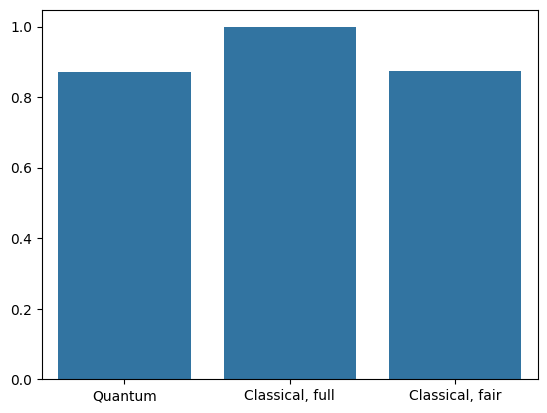

In [36]:
qnn_accuracy = qnn_results[1]
cnn_accuracy = cnn_results[1]
fair_nn_accuracy = fair_nn_results[1]

sns.barplot(x=["Quantum", "Classical, full", "Classical, fair"],
            y=[qnn_accuracy, cnn_accuracy, fair_nn_accuracy])